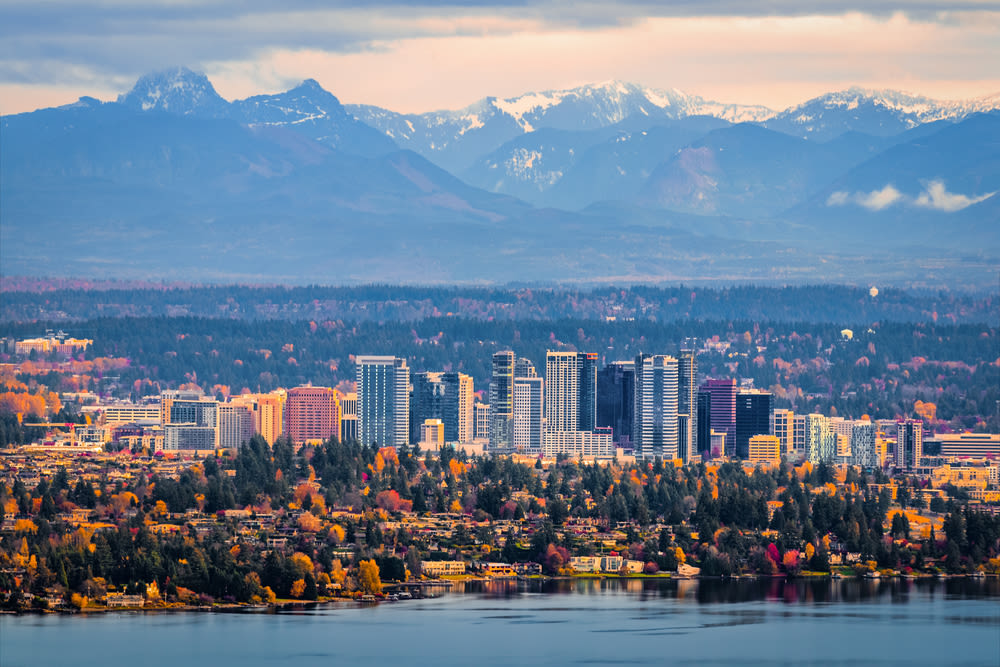

# King County Housing Project

**Authors:** Eddie Juarez, Eliot Kmiec, Dermot O'Brien (DEE Analytics)
***

# Overview
Flatiron Insurance Agency offers a wide variety of property insurance solutions giving a hommeowner the best coverage needed at great prices. Flatiron Insurance Agency is currently dominating the East coast insurance market and wants to make a statement when entering the West Coast market.


# Business Problem

In order to help Flatiron Insurance provide the best coverage to their customers, they need to know what features of their customer's homes impact the home's value. Knowing these features allows our client to accurately estimate how much it will cost to insure the home, and overall helps them protect their bottom line. DEE Analytics will construct a multiple linear regression model as part of an inferential analysis on features of houses in King County. Our team will then use this model to find features that have the strongest impact on house sale price to determine which aspects of a house most strongly affect its value.


# Data Understanding
Data has been collected by the King County Assessor's office, which we are using to construct our model. The data is a set of tabular data containing characteristics of homes that were assessed as part of a property sale between May 2014 and May 2015. The dataset contains over 21,000 entries and roughly 20 features that we will be evaluating. (See project workflow pdf)

In [1]:
# Import standard packages
import itertools
import numpy as np
import pandas as pd 
from numbers import Number
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, RobustScaler
%matplotlib inline

In [2]:
# Import the data
df = pd.read_csv('./data/kc_house_data.csv')

## Column Names and Descriptions for King County Data Set
* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each condition code
* `grade` - Overall grade of the house. Related to the construction and design of the house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each building grade code
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `zipcode` - ZIP Code used by the United States Postal Service
* `lat` - Latitude coordinate
* `long` - Longitude coordinate
* `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
* `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors

## Data Exploration

In [3]:
# check rows and columns
df.shape

(21597, 21)

In [4]:
# check column names
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
# understand the data in each row
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [6]:
# check data types and nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [7]:
# check measures of central tendancy for numeric columns
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
# check for nulls
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Missing values for waterfront, view and yr_renovated

In [9]:
# check variables that are most correlated with price
df.corr()['price'].map(abs).sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
bedrooms         0.308787
lat              0.306692
floors           0.256804
yr_renovated     0.129599
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
zipcode          0.053402
long             0.022036
id               0.016772
Name: price, dtype: float64

Price is most strongly correlated with sqft_living and sqft_above

# Data Preparation

## Workflow Start: EDA and Transformation of Target Outcome

The first step in the construction of our model is to set a target outcome for our model to predict. Due to the skew that was identified in our initial Exploratory Data Analysis for housing prices as a target outcome, a logarithmic transformation was performed to normalize the distribution and satisfy the linearity assumption needed for linear regression.

In [10]:
#selecting outcome and saving as a variable for further use
target = df["price"]

<AxesSubplot:xlabel='price', ylabel='Count'>

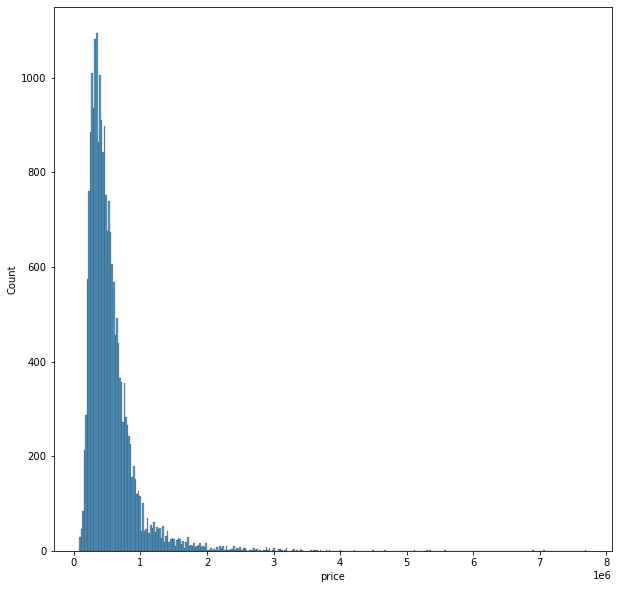

In [11]:
#visualize if price is normally distributed 
plt.subplots(figsize=(10,10))
sns.histplot(target)

In [12]:
#check if price is normally distributed 
target.describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [13]:
#changed setting to display descriptive statistics without scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)
target.describe()


count     21597.00
mean     540296.57
std      367368.14
min       78000.00
25%      322000.00
50%      450000.00
75%      645000.00
max     7700000.00
Name: price, dtype: float64

In [14]:
#possible outliers
target.loc[target>= 6500000]


3910   7060000.00
7245   7700000.00
9245   6890000.00
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Count'>

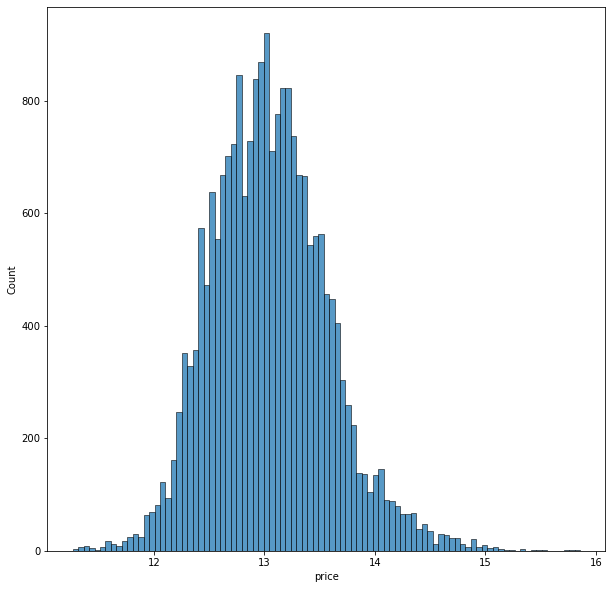

In [15]:
#Handle right-skew with log transform and reassess outlier impact on distribution
ln_target = np.log(target)
#visualize  
plt.subplots(figsize=(10,10))
sns.histplot(ln_target)

In [16]:
#check if price is normally distributed 
ln_target.describe()

count   21597.00
mean       13.05
std         0.53
min        11.26
25%        12.68
50%        13.02
75%        13.38
max        15.86
Name: price, dtype: float64

In [17]:
#skew is near zero - note the difference between median and mean in descriptive stats
#check kurtosis
stats.kurtosis(ln_target)

0.6906107356267648

In [18]:
#since fisher kurtosis score >=0, this distribution is very normal and we will accept this for our target outcome.
#Note that due to this transformation, the final model will be interpreted in terms of logarithm of price rather 
#than simple dollar amounts

#Save new target over old dataframe and rename new dataset
df["price"] = ln_target

#rename
final_df = df.rename(columns={"price":"ln_price"})

#test
final_df

,id,date,ln_price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,12.31,3,1.00,1180,5650,1.00,NaN,NONE,...,7 Average,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,13.20,3,2.25,2570,7242,2.00,NO,NONE,...,7 Average,2170,400.0,1951,1991.00,98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,12.10,2,1.00,770,10000,1.00,NO,NONE,...,6 Low Average,770,0.0,1933,nan,98028,47.74,-122.23,2720,8062
3,2487200875,12/9/2014,13.31,4,3.00,1960,5000,1.00,NO,NONE,...,7 Average,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,13.14,3,2.00,1680,8080,1.00,NO,NONE,...,8 Good,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,12.79,3,2.50,1530,1131,3.00,NO,NONE,...,8 Good,1530,0.0,2009,0.00,98103,47.70,-122.35,1530,1509
21593,6600060120,2/23/2015,12.90,4,2.50,2310,5813,2.00,NO,NONE,...,8 Good,2310,0.0,2014,0.00,98146,47.51,-122.36,1830,7200
21594,1523300141,6/23/2014,12.90,2,0.75,1020,1350,2.00,NO,NONE,...,7 Average,1020,0.0,2009,0.00,98144,47.59,-122.30,1020,2007
21595,291310100,1/16/2015,12.90,3,2.50,1600,2388,2.00,NaN,NONE,...,8 Good,1600,0.0,2004,0.00,98027,47.53,-122.07,1410,1287


In [19]:
#save new dataset as csv
final_df.to_csv("./data/ln_price_dataframe", index=False)
#proceed to further eda in further notebooks

## Categorical Feature Cleaning and Preparation

### Categorical Data Exploration

In [20]:
# Check which columns are categorical
final_df.select_dtypes(include='object')

,date,waterfront,view,condition,grade,sqft_basement
0,10/13/2014,NaN,NONE,Average,7 Average,0.0
1,12/9/2014,NO,NONE,Average,7 Average,400.0
2,2/25/2015,NO,NONE,Average,6 Low Average,0.0
3,12/9/2014,NO,NONE,Very Good,7 Average,910.0
4,2/18/2015,NO,NONE,Average,8 Good,0.0
...,...,...,...,...,...,...
21592,5/21/2014,NO,NONE,Average,8 Good,0.0
21593,2/23/2015,NO,NONE,Average,8 Good,0.0
21594,6/23/2014,NO,NONE,Average,7 Average,0.0
21595,1/16/2015,NaN,NONE,Average,8 Good,0.0


### date

In [21]:
final_df['date'] = pd.to_datetime(final_df['date'])
final_df['date'].sort_values().max()

Timestamp('2015-05-27 00:00:00')

This columns can help our stakeholder to understand when the sale prices were recorded, but won't help us much our model; therefore, we will omit it from our analysis.

### waterfront

In [22]:
final_df.isna().sum()

id                  0
date                0
ln_price            0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [23]:
# Change YES/NO values to True/False
final_df['waterfront'].replace({'YES': True, 'NO': False}, inplace=True)

In [24]:
final_df.loc[final_df['waterfront'] == True].describe()

,id,ln_price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,146.00,146.00,146.00,146.00,146.00,146.00,146.00,146.00,146.00,121.00,146.00,146.00,146.00,146.00,146.00
mean,4454968693.05,14.14,3.35,2.71,3244.75,25870.88,1.63,2508.76,1962.28,476.63,98096.71,47.54,-122.28,2682.83,22893.70
std,2858044756.51,0.69,1.10,1.12,1652.13,44629.08,0.55,1283.72,27.12,852.48,60.60,0.11,0.12,808.41,23264.09
min,121029034.00,12.56,1.00,0.75,440.00,1989.00,1.00,440.00,1905.00,0.00,98004.00,47.33,-122.51,750.00,3230.00
25%,2016368797.00,13.63,3.00,1.81,2082.50,11692.25,1.00,1565.00,1941.25,0.00,98040.00,47.45,-122.38,2075.00,11991.50
50%,3692779634.00,14.23,3.00,2.50,2900.00,17730.50,2.00,2200.00,1959.50,0.00,98075.00,47.55,-122.27,2695.00,16260.50
75%,7390450150.00,14.64,4.00,3.25,4117.50,26692.50,2.00,3220.00,1984.75,0.00,98155.00,47.61,-122.21,3140.00,24537.50
max,9808700762.00,15.77,6.00,6.75,10040.00,505166.00,3.00,7680.00,2014.00,2009.00,98199.00,47.77,-122.06,4913.00,192268.00


Given the small amount of trues and large amount of nulls, we are going to assume this column was not recorded well and omit it from our model.

### view

In [25]:
final_df['view'].isna().sum()

63

In [26]:
final_df['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

Given the 63 nulls and the majority of values being None, we are going to omit this column from our model

### condition

Relative to age and grade. Coded 1-5.

1 = Poor- Worn out. Repair and overhaul needed on painted surfaces, roofing, plumbing, heating and numerous functional inadequacies. Excessive deferred maintenance and abuse, limited value-in-use, approaching abandonment or major reconstruction; reuse or change in occupancy is imminent. Effective age is near the end of the scale regardless of the actual chronological age.

2 = Fair- Badly worn. Much repair needed. Many items need refinishing or overhauling, deferred maintenance obvious, inadequate building utility and systems all shortening the life expectancy and increasing the effective age.

3 = Average- Some evidence of deferred maintenance and normal obsolescence with age in that a few minor repairs are needed, along with some refinishing. All major components still functional and contributing toward an extended life expectancy. Effective age and utility is standard for like properties of its class and usage.

4 = Good- No obvious maintenance required but neither is everything new. Appearance and utility are above the standard and the overall effective age will be lower than the typical property.

5= Very Good- All items well maintained, many having been overhauled and repaired as they have shown signs of wear, increasing the life expectancy and lowering the effective age with little deterioration or obsolescence evident with a high degree of utility.

In [27]:
final_df['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

##### Ordinal Encoder for Condition

Since the order of the categorical values matters (we expect a Very Good home to be higher in value than a Poor home), we will try to Ordinal Encode this category.

In [28]:
# Set up Ordinal Encoder
condition = final_df['condition']
condition_df = pd.DataFrame(condition)
#cond_cat = [list(final_df['condition'].value_counts().keys())]
cond_cat = [['Poor', 'Fair', 'Average', 'Good', 'Very Good']]
ords_cond = OrdinalEncoder(categories=cond_cat)
ords_cond.fit(condition_df)
X_cond_transform = ords_cond.transform(condition_df)

In [29]:
# Run the regression
y = final_df['ln_price']
X_condition_ord = sm.add_constant(X_cond_transform)
X_condition_ord_results = sm.OLS(y, X_condition_ord).fit().summary()
X_condition_ord_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     32.76
Date:                Fri, 28 Oct 2022   Prob (F-statistic):           1.06e-08
Time:                        16:44:17   Log-Likelihood:                -16776.
No. Observations:               21597   AIC:                         3.356e+04
Df Residuals:                   21595   BIC:                         3.357e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.9723      0.014    944.272      0.000      12.945      12.999
x1             0.0315      0.006      5.723      0.000       0.021       0.042
==============================================================================
Omnibus:                      851.356   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1086.243
Skew:                           0.429   Prob(JB):                    1.33e-236
Kurtosis:                       3.686   Cond. No.                         11.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

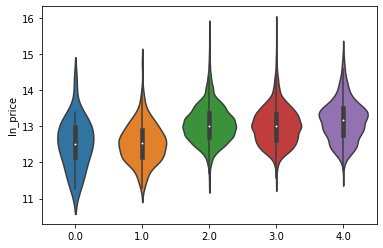

In [30]:
# Create a violin plot to understand correlation
X_iterable = [i[0] for i in X_cond_transform]
sns.violinplot(y=y, x=X_iterable);

In [31]:
# See how correlated Condition is with Price
cond_transform_df = pd.DataFrame(X_cond_transform)
pd.concat([y, cond_transform_df], axis=1).corr()

,ln_price,0
ln_price,1.00,0.04
0,0.04,1.00


In [32]:
# Convert array into dataframe
X_condition_ord_df = pd.DataFrame(X_cond_transform, columns=['cond_ord'])
X_condition_ord_df

,cond_ord
0,2.00
1,2.00
2,2.00
3,4.00
4,2.00
...,...
21592,2.00
21593,2.00
21594,2.00
21595,2.00


##### One Hot Encoding

In [33]:
ohe_cond = OneHotEncoder(drop='first') # drops average, first and most frequent
ohe_cond.fit(condition_df)
condition_hot = pd.DataFrame(ohe_cond.transform(condition_df).todense(), columns=ohe_cond.get_feature_names())
#condition_encoded

In [34]:
# Run the regression
X_cond_hot = sm.add_constant(condition_hot)
X_condition_hot_results = sm.OLS(y, X_cond_hot).fit().summary()
X_condition_hot_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     74.33
Date:                Fri, 28 Oct 2022   Prob (F-statistic):           1.11e-62
Time:                        16:44:17   Log-Likelihood:                -16644.
No. Observations:               21597   AIC:                         3.330e+04
Df Residuals:                   21592   BIC:                         3.334e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           13.0567      0.004   2955.925      0.000      13.048      13.065
x0_Fair         -0.5174      0.040    -12.822      0.000      -0.597      -0.438
x0_Good         -0.0445      0.008     -5.405      0.000      -0.061      -0.028
x0_Poor         -0.5439      0.097     -5.594      0.000      -0.734      -0.353
x0_Very Good     0.1016      0.013      7.568      0.000       0.075       0.128
==============================================================================
Omnibus:                      901.392   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1151.502
Skew:                           0.446   Prob(JB):                    9.01e-251
Kurtosis:                       3.696   Cond. No.                         28.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### grade

Represents the construction quality of improvements. Grades run from grade 1 to 13. Generally defined as:

1-3 Falls short of minimum building standards. Normally cabin or inferior structure.

4 Generally older, low quality construction. Does not meet code.

5 Low construction costs and workmanship. Small, simple design.

6 Lowest grade currently meeting building code. Low quality materials and simple designs.

7 Average grade of construction and design. Commonly seen in plats and older sub-divisions.

8 Just above average in construction and design. Usually better materials in both the exterior and interior finish work.

9 Better architectural design with extra interior and exterior design and quality.

10 Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

11 Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

12 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

13 Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.

In [35]:
final_df['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

##### Ordinal Encoder

Since the order of the categorical values matters (we expect a Very Good home to be higher in value than a Poor home), we will try to Ordinal Encode this category.

In [36]:
# Set up Ordinal Encoder
grade = final_df['grade']
grade_df = pd.DataFrame(grade)
grade_cat = [['3 Poor', '4 Low', '5 Fair', '6 Low Average', '7 Average', '8 Good', '9 Better', '10 Very Good', '11 Excellent', '12 Luxury', '13 Mansion']]
ords_grade = OrdinalEncoder(categories=grade_cat)
ords_grade.fit(grade_df)
X_grade_transform = ords_grade.transform(grade_df)

In [37]:
# Run the regression
X_grade_ord = sm.add_constant(X_grade_transform)
X_grade_ord_results = sm.OLS(y, X_grade_ord).fit().summary()
X_grade_ord_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                 2.119e+04
Date:                Fri, 28 Oct 2022   Prob (F-statistic):               0.00
Time:                        16:44:17   Log-Likelihood:                -9409.7
No. Observations:               21597   AIC:                         1.882e+04
Df Residuals:                   21595   BIC:                         1.884e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.5770      0.010   1110.721      0.000      11.557      11.597
x1             0.3158      0.002    145.555      0.000       0.312       0.320
==============================================================================
Omnibus:                      130.298   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.708
Skew:                           0.181   Prob(JB):                     9.24e-30
Kurtosis:                       3.130   Cond. No.                         20.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
# Convert array into dataframe
X_grade_ord_df = pd.DataFrame(X_grade_transform, columns=['grade_ord'])
X_grade_ord_df

,grade_ord
0,4.00
1,4.00
2,3.00
3,4.00
4,5.00
...,...
21592,5.00
21593,5.00
21594,4.00
21595,5.00


##### One Hot Encoding

In [39]:
# Set up One Hot Encoder
ohe_grade = OneHotEncoder(drop='first') # drops average, first and most frequent
ohe_grade.fit(grade_df)
grade_hot = pd.DataFrame(ohe_grade.transform(grade_df).todense(), columns=ohe_grade.get_feature_names())
#grade_encoded

In [40]:
# Run the regression
X_grade_hot = sm.add_constant(grade_hot)
X_grade_hot_results = sm.OLS(y, X_grade_hot).fit().summary()
X_grade_hot_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     2135.
Date:                Fri, 28 Oct 2022   Prob (F-statistic):               0.00
Time:                        16:44:17   Log-Likelihood:                -9365.6
No. Observations:               21597   AIC:                         1.875e+04
Df Residuals:                   21586   BIC:                         1.884e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               13.8030      0.011   1244.729      0.000      13.781      13.825
x0_11 Excellent      0.3288      0.022     15.128      0.000       0.286       0.371
x0_12 Luxury         0.7116      0.041     17.311      0.000       0.631       0.792
x0_13 Mansion        1.2252      0.104     11.762      0.000       1.021       1.429
x0_3 Poor           -1.3269      0.374     -3.552      0.000      -2.059      -0.595
x0_4 Low            -1.6429      0.073    -22.593      0.000      -1.785      -1.500
x0_5 Fair           -1.4797      0.026    -55.959      0.000      -1.532      -1.428
x0_6 Low Average    -1.2592      0.014    -91.021      0.000      -1.286      -1.232
x0_7 Average        -0.9664      0.012    -82.116      0.000      -0.989      -0.943
x0_8 Good           -0.6668      0.012    -55.192      0.000      -0.690      -0.643
x0_9 Better         -0.3156      0.013    -23.770      0.000      -0.342      -0.290
==============================================================================
Omnibus:                      113.879   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.448
Skew:                           0.170   Prob(JB):                     5.17e-26
Kurtosis:                       3.118   Cond. No.                         167.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Create CSV's for Modeling

To use both condition and grade in our models, we are going to create csv's - combining the ordinal encoded data and ohe data into separate dataframes

In [41]:
# Concat Ordinal Encdoded Dataframes from condition and grade into one dataframe
X_cat_ordinal_df = pd.concat([X_condition_ord_df, X_grade_ord_df], axis=1)
X_cat_ordinal_df

,cond_ord,grade_ord
0,2.00,4.00
1,2.00,4.00
2,2.00,3.00
3,4.00,4.00
4,2.00,5.00
...,...,...
21592,2.00,5.00
21593,2.00,5.00
21594,2.00,4.00
21595,2.00,5.00


In [42]:
# Convert ordinal dataframe into a csv
X_cat_ordinal_df.to_csv("./data/cat_ordinal_dataframe", index=False)

In [43]:
# Concat Ordinal Encdoded Dataframes from condition and grade into one dataframe
X_cat_hot_df = pd.concat([condition_hot, grade_hot], axis=1) 
X_cat_hot_df

,x0_Fair,x0_Good,x0_Poor,x0_Very Good,x0_11 Excellent,x0_12 Luxury,x0_13 Mansion,x0_3 Poor,x0_4 Low,x0_5 Fair,x0_6 Low Average,x0_7 Average,x0_8 Good,x0_9 Better
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
3,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
21593,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
21594,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
21595,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00


Important to note: From the condition table, "Average" value was dropped. From the grade table, "10 Very Good" was dropped. We defaulted to dropping the first value in each category.

In [44]:
# Convert ohe dataframe into a csv
X_cat_hot_df.to_csv("./data/cat_hot_dataframe", index=False)

## Numeric Data Cleaning and Preparation

# Investigating the data

In [45]:
#checking import of data
final_df                  

,id,date,ln_price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,12.31,3,1.00,1180,5650,1.00,NaN,NONE,...,7 Average,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,2014-12-09,13.20,3,2.25,2570,7242,2.00,False,NONE,...,7 Average,2170,400.0,1951,1991.00,98125,47.72,-122.32,1690,7639
2,5631500400,2015-02-25,12.10,2,1.00,770,10000,1.00,False,NONE,...,6 Low Average,770,0.0,1933,nan,98028,47.74,-122.23,2720,8062
3,2487200875,2014-12-09,13.31,4,3.00,1960,5000,1.00,False,NONE,...,7 Average,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2015-02-18,13.14,3,2.00,1680,8080,1.00,False,NONE,...,8 Good,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,12.79,3,2.50,1530,1131,3.00,False,NONE,...,8 Good,1530,0.0,2009,0.00,98103,47.70,-122.35,1530,1509
21593,6600060120,2015-02-23,12.90,4,2.50,2310,5813,2.00,False,NONE,...,8 Good,2310,0.0,2014,0.00,98146,47.51,-122.36,1830,7200
21594,1523300141,2014-06-23,12.90,2,0.75,1020,1350,2.00,False,NONE,...,7 Average,1020,0.0,2009,0.00,98144,47.59,-122.30,1020,2007
21595,291310100,2015-01-16,12.90,3,2.50,1600,2388,2.00,NaN,NONE,...,8 Good,1600,0.0,2004,0.00,98027,47.53,-122.07,1410,1287


In [46]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   ln_price       21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  object        
 9   view           21534 non-null  object        
 10  condition      21597 non-null  object        
 11  grade          21597 non-null  object        
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

In [47]:
#categorical data being handled in separate notebook - keeping only numeric data
df1 = final_df.drop(df[['date', 'view', 'waterfront','condition','grade','zipcode','lat', 'long' ]], axis = 1)
df1.head()



,id,ln_price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,7129300520,12.31,3,1.00,1180,5650,1.00,1180,0.0,1955,0.00,1340,5650
1,6414100192,13.20,3,2.25,2570,7242,2.00,2170,400.0,1951,1991.00,1690,7639
2,5631500400,12.10,2,1.00,770,10000,1.00,770,0.0,1933,nan,2720,8062
3,2487200875,13.31,4,3.00,1960,5000,1.00,1050,910.0,1965,0.00,1360,5000
4,1954400510,13.14,3,2.00,1680,8080,1.00,1680,0.0,1987,0.00,1800,7503


In [48]:
df1.shape

(21597, 13)

In [49]:
#checking data types
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   ln_price       21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   sqft_above     21597 non-null  int64  
 8   sqft_basement  21597 non-null  object 
 9   yr_built       21597 non-null  int64  
 10  yr_renovated   17755 non-null  float64
 11  sqft_living15  21597 non-null  int64  
 12  sqft_lot15     21597 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 2.1+ MB


Converting non-numeric data types into numeric data types for later regression

In [50]:
df1['sqft_basement'] = df1['sqft_basement'].replace('?', '0.0')
df1['sqft_basement'] = pd.to_numeric(df1['sqft_basement'], errors='coerce')
df1['sqft_basement']

0         0.00
1       400.00
2         0.00
3       910.00
4         0.00
         ...  
21592     0.00
21593     0.00
21594     0.00
21595     0.00
21596     0.00
Name: sqft_basement, Length: 21597, dtype: float64

In [51]:
df1['sqft_basement'].value_counts()

0.00       13280
600.00       217
500.00       209
700.00       208
800.00       201
           ...  
915.00         1
295.00         1
1281.00        1
2130.00        1
906.00         1
Name: sqft_basement, Length: 303, dtype: int64

In [52]:
#check data types 
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   ln_price       21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   sqft_above     21597 non-null  int64  
 8   sqft_basement  21597 non-null  float64
 9   yr_built       21597 non-null  int64  
 10  yr_renovated   17755 non-null  float64
 11  sqft_living15  21597 non-null  int64  
 12  sqft_lot15     21597 non-null  int64  
dtypes: float64(5), int64(8)
memory usage: 2.1 MB


# Checking Distributions

/Users/dermotobrien/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dermotobrien/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dermotobrien/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code

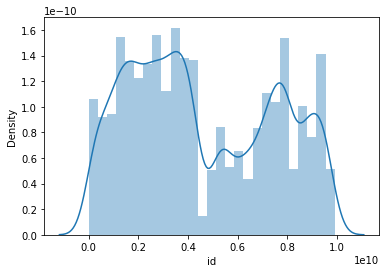

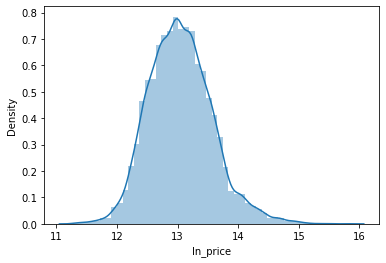

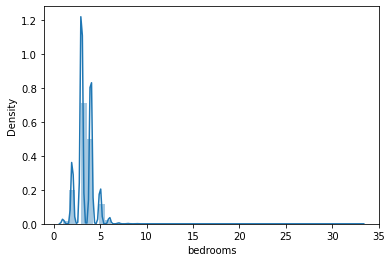

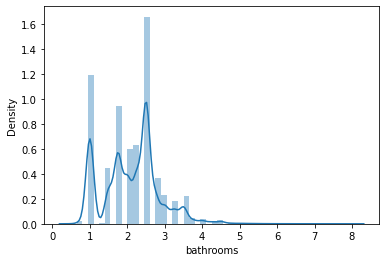

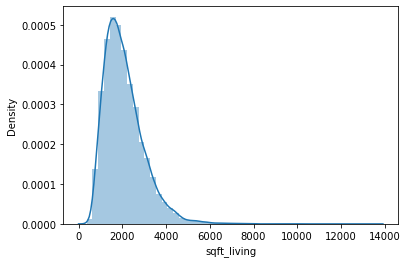

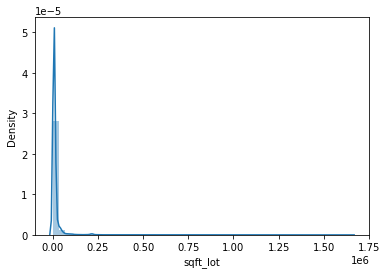

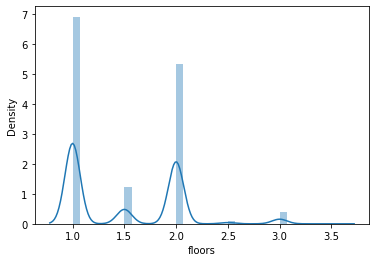

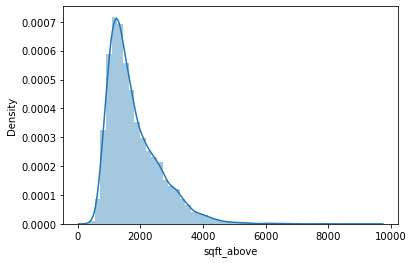

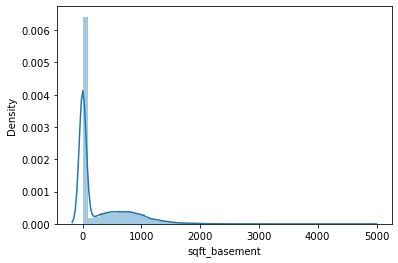

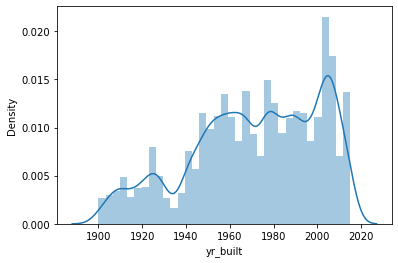

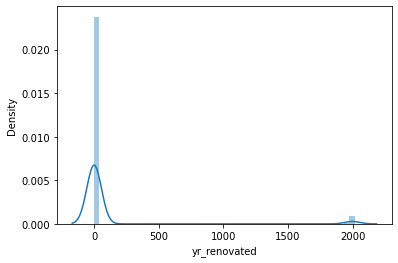

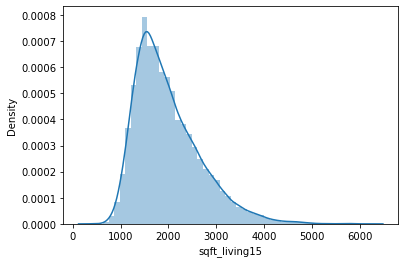

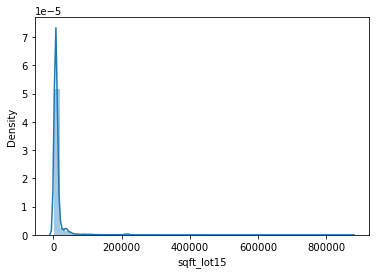

In [53]:
#visualize distributions
for a, column in enumerate(df1.columns):
    plt.figure(a)
    sns.distplot(df1[column])

Note the following: 
- severe outliers apparent in sqft_lot15, sqft_basement, sqft_lot
- right tail skew in sqft_living15, sqft_above, sqft_above
- bimodal distribution in yr_renovated with lots of null values
- left tail skew in yr_built, possible multimodality due to spikes in housing construction

*skewed distributions may require transformation to satisfy linear relationship assumption of linear regression. 

*floors, bedrooms, and bathrooms may be usable in their current state with minimal cleaning needed

### convert yr_renovated into boolean data type indicating a house has been renovated or not

In [54]:
for i,r in enumerate(df1["yr_renovated"]):
    if r == 0:
        df1["yr_renovated"][i] = False
    else:
        df1["yr_renovated"][i] = True

<ipython-input-54-08089abd4cd1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["yr_renovated"][i] = False
/Users/dermotobrien/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-54-08089abd4cd1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["yr_renovated"][i] = True


In [55]:
df1

,id,ln_price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,7129300520,12.31,3,1.00,1180,5650,1.00,1180,0.00,1955,False,1340,5650
1,6414100192,13.20,3,2.25,2570,7242,2.00,2170,400.00,1951,True,1690,7639
2,5631500400,12.10,2,1.00,770,10000,1.00,770,0.00,1933,True,2720,8062
3,2487200875,13.31,4,3.00,1960,5000,1.00,1050,910.00,1965,False,1360,5000
4,1954400510,13.14,3,2.00,1680,8080,1.00,1680,0.00,1987,False,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,12.79,3,2.50,1530,1131,3.00,1530,0.00,2009,False,1530,1509
21593,6600060120,12.90,4,2.50,2310,5813,2.00,2310,0.00,2014,False,1830,7200
21594,1523300141,12.90,2,0.75,1020,1350,2.00,1020,0.00,2009,False,1020,2007
21595,291310100,12.90,3,2.50,1600,2388,2.00,1600,0.00,2004,False,1410,1287


In [56]:
#rename yr_renovated
df1.rename(columns={"yr_renovated": "renovated"}, inplace=True)
df1.head()

,id,ln_price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,renovated,sqft_living15,sqft_lot15
0,7129300520,12.31,3,1.00,1180,5650,1.00,1180,0.00,1955,False,1340,5650
1,6414100192,13.20,3,2.25,2570,7242,2.00,2170,400.00,1951,True,1690,7639
2,5631500400,12.10,2,1.00,770,10000,1.00,770,0.00,1933,True,2720,8062
3,2487200875,13.31,4,3.00,1960,5000,1.00,1050,910.00,1965,False,1360,5000
4,1954400510,13.14,3,2.00,1680,8080,1.00,1680,0.00,1987,False,1800,7503


In [57]:
#one hot encode renovation data
ohe_df = pd.DataFrame(df1["renovated"])
ohe = OneHotEncoder(drop='first') # drops average, first and most frequent
ohe.fit(ohe_df)
renovation_df = pd.DataFrame(ohe.transform(ohe_df).todense(), columns=ohe.get_feature_names())


In [58]:
renovation_df

,x0_True
0,0.00
1,1.00
2,1.00
3,0.00
4,0.00
...,...
21592,0.00
21593,0.00
21594,0.00
21595,0.00


In [59]:
#linreg on ohe, assumption check 
sm.OLS(df1["ln_price"], sm.add_constant(renovation_df)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     42.62
Date:                Fri, 28 Oct 2022   Prob (F-statistic):           6.78e-11
Time:                        16:44:24   Log-Likelihood:                -16771.
No. Observations:               21597   AIC:                         3.355e+04
Df Residuals:                   21595   BIC:                         3.356e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0361      0.004   3232.112      0.000      13.028      13.044
x0_True        0.0571      0.009      6.529      0.000       0.040       0.074
==============================================================================
Omnibus:                      835.885   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1066.231
Skew:                           0.424   Prob(JB):                    2.96e-232
Kurtosis:                       3.683   Cond. No.                         2.58
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
df1["renovated"] = renovation_df["x0_True"]
df1

,id,ln_price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,renovated,sqft_living15,sqft_lot15
0,7129300520,12.31,3,1.00,1180,5650,1.00,1180,0.00,1955,0.00,1340,5650
1,6414100192,13.20,3,2.25,2570,7242,2.00,2170,400.00,1951,1.00,1690,7639
2,5631500400,12.10,2,1.00,770,10000,1.00,770,0.00,1933,1.00,2720,8062
3,2487200875,13.31,4,3.00,1960,5000,1.00,1050,910.00,1965,0.00,1360,5000
4,1954400510,13.14,3,2.00,1680,8080,1.00,1680,0.00,1987,0.00,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,12.79,3,2.50,1530,1131,3.00,1530,0.00,2009,0.00,1530,1509
21593,6600060120,12.90,4,2.50,2310,5813,2.00,2310,0.00,2014,0.00,1830,7200
21594,1523300141,12.90,2,0.75,1020,1350,2.00,1020,0.00,2009,0.00,1020,2007
21595,291310100,12.90,3,2.50,1600,2388,2.00,1600,0.00,2004,0.00,1410,1287


### Convert Year of Construction to Age

In [61]:
df1["yr_built"].isna().sum()

0

In [62]:
df1["yr_built"] = 2015 - df1["yr_built"]
df1

,id,ln_price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,renovated,sqft_living15,sqft_lot15
0,7129300520,12.31,3,1.00,1180,5650,1.00,1180,0.00,60,0.00,1340,5650
1,6414100192,13.20,3,2.25,2570,7242,2.00,2170,400.00,64,1.00,1690,7639
2,5631500400,12.10,2,1.00,770,10000,1.00,770,0.00,82,1.00,2720,8062
3,2487200875,13.31,4,3.00,1960,5000,1.00,1050,910.00,50,0.00,1360,5000
4,1954400510,13.14,3,2.00,1680,8080,1.00,1680,0.00,28,0.00,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,12.79,3,2.50,1530,1131,3.00,1530,0.00,6,0.00,1530,1509
21593,6600060120,12.90,4,2.50,2310,5813,2.00,2310,0.00,1,0.00,1830,7200
21594,1523300141,12.90,2,0.75,1020,1350,2.00,1020,0.00,6,0.00,1020,2007
21595,291310100,12.90,3,2.50,1600,2388,2.00,1600,0.00,11,0.00,1410,1287


In [63]:
df1.rename(columns={"yr_built":"age"}, inplace=True)
df1.columns

Index(['id', 'ln_price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'sqft_above', 'sqft_basement', 'age', 'renovated',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

### Taking a closer look at sqft_lot15, sqft_basement, sqft_lot

In [64]:
#general look at central tendency of the 3 features with severe outliers
df1["sqft_lot15"].describe(), df1["sqft_basement"].describe(), df1["sqft_lot"].describe()

(count    21597.00
 mean     12758.28
 std      27274.44
 min        651.00
 25%       5100.00
 50%       7620.00
 75%      10083.00
 max     871200.00
 Name: sqft_lot15, dtype: float64,
 count   21597.00
 mean      285.72
 std       439.82
 min         0.00
 25%         0.00
 50%         0.00
 75%       550.00
 max      4820.00
 Name: sqft_basement, dtype: float64,
 count     21597.00
 mean      15099.41
 std       41412.64
 min         520.00
 25%        5040.00
 50%        7618.00
 75%       10685.00
 max     1651359.00
 Name: sqft_lot, dtype: float64)

severe outliers present in sqft_lot15 - note the order of magnitude difference between 75th percentile and max

large presence of nulls in sqft_basement

sqft_lot similar to sqft_lot15 but with greater severity - max is two orders larger than 75th percentile

# Test for Linearity Assumption

In [65]:
df1

,id,ln_price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,age,renovated,sqft_living15,sqft_lot15
0,7129300520,12.31,3,1.00,1180,5650,1.00,1180,0.00,60,0.00,1340,5650
1,6414100192,13.20,3,2.25,2570,7242,2.00,2170,400.00,64,1.00,1690,7639
2,5631500400,12.10,2,1.00,770,10000,1.00,770,0.00,82,1.00,2720,8062
3,2487200875,13.31,4,3.00,1960,5000,1.00,1050,910.00,50,0.00,1360,5000
4,1954400510,13.14,3,2.00,1680,8080,1.00,1680,0.00,28,0.00,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,12.79,3,2.50,1530,1131,3.00,1530,0.00,6,0.00,1530,1509
21593,6600060120,12.90,4,2.50,2310,5813,2.00,2310,0.00,1,0.00,1830,7200
21594,1523300141,12.90,2,0.75,1020,1350,2.00,1020,0.00,6,0.00,1020,2007
21595,291310100,12.90,3,2.50,1600,2388,2.00,1600,0.00,11,0.00,1410,1287


In [66]:
#drop basement sqft since majority of houses in king county do not have basements

df1 = df1.drop(labels="sqft_basement", axis=1)
df1

,id,ln_price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,age,renovated,sqft_living15,sqft_lot15
0,7129300520,12.31,3,1.00,1180,5650,1.00,1180,60,0.00,1340,5650
1,6414100192,13.20,3,2.25,2570,7242,2.00,2170,64,1.00,1690,7639
2,5631500400,12.10,2,1.00,770,10000,1.00,770,82,1.00,2720,8062
3,2487200875,13.31,4,3.00,1960,5000,1.00,1050,50,0.00,1360,5000
4,1954400510,13.14,3,2.00,1680,8080,1.00,1680,28,0.00,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,12.79,3,2.50,1530,1131,3.00,1530,6,0.00,1530,1509
21593,6600060120,12.90,4,2.50,2310,5813,2.00,2310,1,0.00,1830,7200
21594,1523300141,12.90,2,0.75,1020,1350,2.00,1020,6,0.00,1020,2007
21595,291310100,12.90,3,2.50,1600,2388,2.00,1600,11,0.00,1410,1287


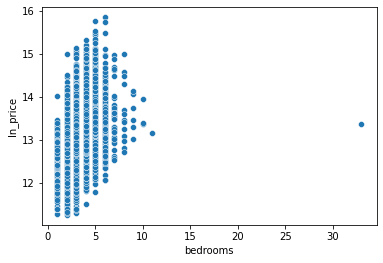

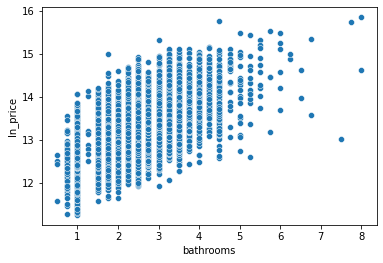

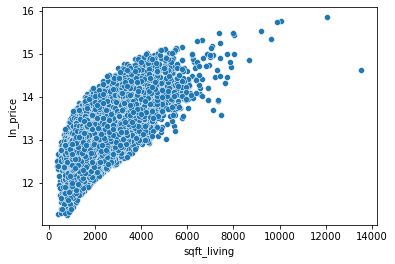

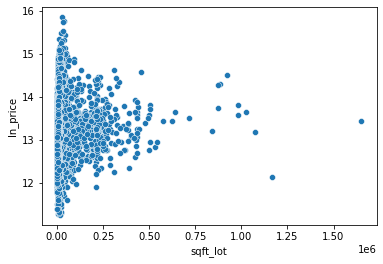

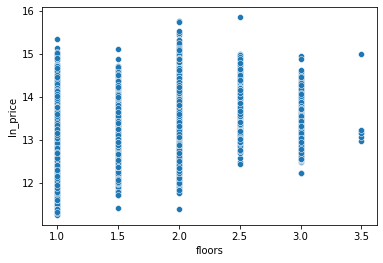

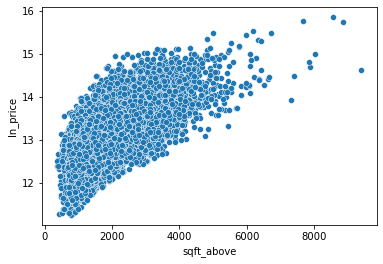

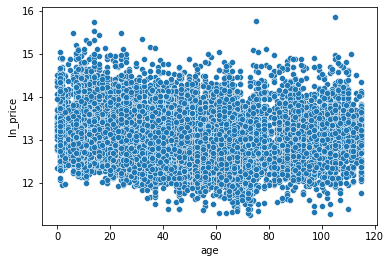

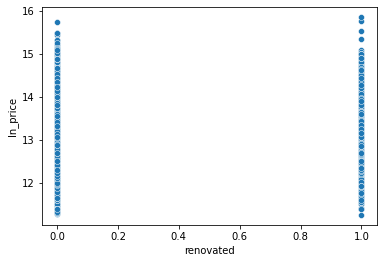

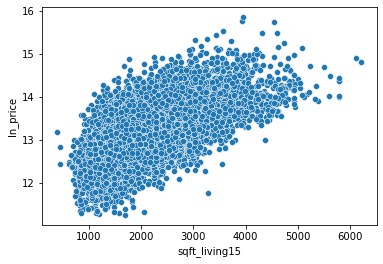

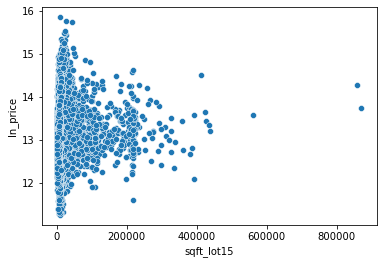

In [67]:
#visualize scatter plot of each variable against the target outcome to check for linearity
target = df1["ln_price"]
inputs = df1.drop(labels=["id","ln_price"], axis=1)
for a, column in enumerate(inputs.columns):
    plt.figure(a)
    sns.scatterplot(y=target, x=inputs[column])

sqft_above, sqft_living, possibly sqft_living15, are non-linear - need transform? or non-logarithmic target

sqft_lot15 needs nulls addressed?

In [68]:
#no nulls found
df1["sqft_lot15"].describe()

count    21597.00
mean     12758.28
std      27274.44
min        651.00
25%       5100.00
50%       7620.00
75%      10083.00
max     871200.00
Name: sqft_lot15, dtype: float64

<AxesSubplot:xlabel='sqft_above', ylabel='ln_price'>

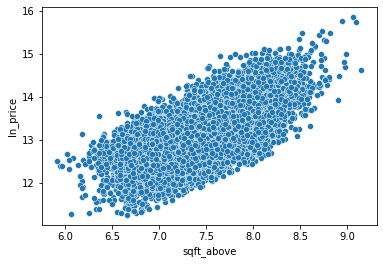

In [69]:
#natural log transform sqft_above - attempt to address non-linearity
inputs["sqft_above"] = np.log(inputs["sqft_above"])
sns.scatterplot(y=target, x=inputs["sqft_above"])

<AxesSubplot:xlabel='sqft_living', ylabel='ln_price'>

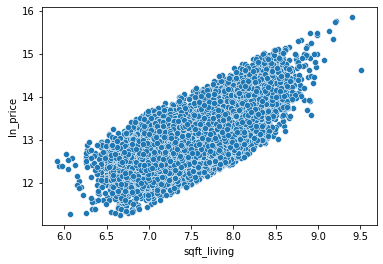

In [70]:
#natural log transform sqft_living - attempt to address non-linearity
inputs["sqft_living"] = np.log(inputs["sqft_living"])
sns.scatterplot(y=target, x=inputs["sqft_living"])

<AxesSubplot:xlabel='sqft_living15', ylabel='ln_price'>

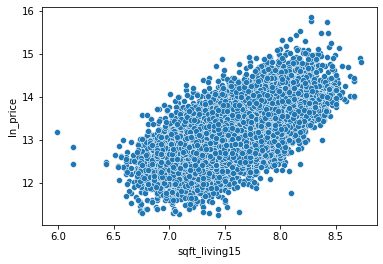

In [71]:
#natural log transform sqft_living15 - attempt to address non-linearity
inputs["sqft_living15"] = np.log(inputs["sqft_living15"])
sns.scatterplot(y=target, x=inputs["sqft_living15"])

In [72]:
#rename all affected columns to reflect the changes above
inputs.rename(columns={"sqft_above":"ln_sqft_above", 
                       "sqft_living":"ln_sqft_living",
                       "sqft_living15":"ln_sqft_living15"},
             inplace=True)
inputs

,bedrooms,bathrooms,ln_sqft_living,sqft_lot,floors,ln_sqft_above,age,renovated,ln_sqft_living15,sqft_lot15
0,3,1.00,7.07,5650,1.00,7.07,60,0.00,7.20,5650
1,3,2.25,7.85,7242,2.00,7.68,64,1.00,7.43,7639
2,2,1.00,6.65,10000,1.00,6.65,82,1.00,7.91,8062
3,4,3.00,7.58,5000,1.00,6.96,50,0.00,7.22,5000
4,3,2.00,7.43,8080,1.00,7.43,28,0.00,7.50,7503
...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,7.33,1131,3.00,7.33,6,0.00,7.33,1509
21593,4,2.50,7.75,5813,2.00,7.75,1,0.00,7.51,7200
21594,2,0.75,6.93,1350,2.00,6.93,6,0.00,6.93,2007
21595,3,2.50,7.38,2388,2.00,7.38,11,0.00,7.25,1287


In [73]:
#save initial model inputs and natural log target prices for use in final constructor notebook via csv
inputs.to_csv("./data/initial_numeric_inputs", index=False)
target.to_csv("./data/house_price_target_natlog", index=False)

# Final Model Construction

Below is the construction for a multiple linear regression model predicting housing prices in King County. Data is imported from the preprocessed data that was cleaned in preceding notebooks and saved as separate csv files. The data is imported to this notebook and combined for the first model. Further iterations are contained in additional subsections of this notebook.

## Import and Combine Cleaned Data

In [74]:
categorical_ohe = pd.read_csv("./data/cat_hot_dataframe")
categorical_ordinal = pd.read_csv("./data/cat_ordinal_dataframe")
numeric = pd.read_csv("./data/initial_numeric_inputs")
target = pd.read_csv("./data/house_price_target_natlog")

## Construct Model

In [75]:
all_predictors = pd.concat([numeric, categorical_ohe, categorical_ordinal], axis=1)

In [76]:
#defining constructor function so it can be used for each iteration

def construct_model(exog_df, endog=target):
    ''' This function takes a dataframe of feature variables, performs robust scaling, 
    and returns summary statistics. '''
   
    rscale = RobustScaler()
    rs = rscale.fit_transform(exog_df)
    rs_df = pd.DataFrame(rs, columns=exog_df.columns, index=exog_df.index)
    
    exog = sm.add_constant(rs_df)
    
    model = sm.OLS(endog, exog).fit().summary()
    return model

## 1st Iteration

In [77]:
#run 1st model

#concatenate numeric and target to run a correlation
run_corr = pd.concat([target, numeric], axis=1)
run_corr.corr()['ln_price'].sort_values(ascending=False)

ln_price            1.00
ln_sqft_living      0.67
ln_sqft_living15    0.61
ln_sqft_above       0.59
bathrooms           0.55
bedrooms            0.34
floors              0.31
sqft_lot            0.10
sqft_lot15          0.09
renovated           0.04
age                -0.08
Name: ln_price, dtype: float64

Since ln_sqft_living is our highest correlated variable to ln_price, we will use it to run our first regression

In [78]:
# run first model
construct_model(pd.DataFrame(all_predictors['ln_sqft_living']))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                 1.805e+04
Date:                Fri, 28 Oct 2022   Prob (F-statistic):               0.00
Time:                        16:44:27   Log-Likelihood:                -10231.
No. Observations:               21597   AIC:                         2.047e+04
Df Residuals:                   21595   BIC:                         2.048e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             13.0517      0.003   4935.519      0.000      13.046      13.057
ln_sqft_living     0.4845      0.004    134.368      0.000       0.477       0.492
==============================================================================
Omnibus:                      123.577   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.096
Skew:                           0.143   Prob(JB):                     1.68e-25
Kurtosis:                       2.787   Cond. No.                         1.36
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Evaluate Model Performance

The model accounts for roughly 45% of the target variable variance. ln_sqft_living is statistically signficant with a pvalue less than our alpha at .05. A one unit in iqr of log_sqft_living will increase our log_price by .4845.

### Assess Potential Model Improvements

(1) Increase our rsquared with additional variables

(2) Trim outliers as needed to imrove normality of inputs (JB Score)

## 2nd Iteration

In [79]:
# create a function that concatenates our next feature variable to our exog dataframe
current_model = pd.DataFrame(all_predictors['ln_sqft_living'])

def iterate(feature):
    feature_df = pd.DataFrame(feature)
    model = pd.concat([current_model, feature_df], axis=1)
    return model

In [80]:
# run 2nd model adding ln_sqft_living15
current_model = iterate(all_predictors['ln_sqft_living15'])
construct_model(current_model)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     9944.
Date:                Fri, 28 Oct 2022   Prob (F-statistic):               0.00
Time:                        16:44:27   Log-Likelihood:                -9742.3
No. Observations:               21597   AIC:                         1.949e+04
Df Residuals:                   21594   BIC:                         1.951e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               13.0425      0.003   5013.451      0.000      13.037      13.048
ln_sqft_living       0.3594      0.005     67.795      0.000       0.349       0.370
ln_sqft_living15     0.1725      0.005     31.603      0.000       0.162       0.183
==============================================================================
Omnibus:                      150.085   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.925
Skew:                           0.128   Prob(JB):                     2.75e-28
Kurtosis:                       2.726   Cond. No.                         2.77
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Assess Potential Model Improvements

R2 value was increased, however, some multicollinearity was observed and there are still significant deviations from normality in our inputs overall.

## 3rd Iteration

In [81]:
# run 3rd model
current_model = iterate(all_predictors['ln_sqft_above'])
construct_model(current_model)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     6649.
Date:                Fri, 28 Oct 2022   Prob (F-statistic):               0.00
Time:                        16:44:27   Log-Likelihood:                -9727.0
No. Observations:               21597   AIC:                         1.946e+04
Df Residuals:                   21593   BIC:                         1.949e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               13.0454      0.003   4923.924      0.000      13.040      13.051
ln_sqft_living       0.3892      0.008     51.510      0.000       0.374       0.404
ln_sqft_living15     0.1787      0.006     32.091      0.000       0.168       0.190
ln_sqft_above       -0.0421      0.008     -5.529      0.000      -0.057      -0.027
==============================================================================
Omnibus:                      135.412   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              118.075
Skew:                           0.130   Prob(JB):                     2.29e-26
Kurtosis:                       2.748   Cond. No.                         4.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Assess Potential Model Improvements

R2 indicates our model's correlation has improved marginally, however, normality has also been significantly improved. Feature will be retained.

## 4th Iteration

In [82]:
# run 4th model
# add bathrooms
current_model = iterate(all_predictors['bathrooms'])
construct_model(current_model)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     5058.
Date:                Fri, 28 Oct 2022   Prob (F-statistic):               0.00
Time:                        16:44:27   Log-Likelihood:                -9652.9
No. Observations:               21597   AIC:                         1.932e+04
Df Residuals:                   21592   BIC:                         1.936e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               13.0542      0.003   4765.913      0.000      13.049      13.060
ln_sqft_living       0.3462      0.008     41.654      0.000       0.330       0.363
ln_sqft_living15     0.1799      0.006     32.403      0.000       0.169       0.191
ln_sqft_above       -0.0527      0.008     -6.899      0.000      -0.068      -0.038
bathrooms            0.0476      0.004     12.193      0.000       0.040       0.055
==============================================================================
Omnibus:                      148.808   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.488
Skew:                           0.129   Prob(JB):                     3.42e-28
Kurtosis:                       2.728   Cond. No.                         5.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Assess Potential Model Improvements¶

R2 value indicates the model has increased correlation strength at the cost of slightly increased collinearity and decreased normality in our inputs. Feature retained.

## 5th Iteration

In [83]:
# run 4th model
# add bedrooms
current_model = iterate(all_predictors['bedrooms'])
construct_model(current_model)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     4171.
Date:                Fri, 28 Oct 2022   Prob (F-statistic):               0.00
Time:                        16:44:27   Log-Likelihood:                -9493.3
No. Observations:               21597   AIC:                         1.900e+04
Df Residuals:                   21591   BIC:                         1.905e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               13.0804      0.003   4238.259      0.000      13.074      13.086
ln_sqft_living       0.4021      0.009     45.591      0.000       0.385       0.419
ln_sqft_living15     0.1699      0.006     30.667      0.000       0.159       0.181
ln_sqft_above       -0.0587      0.008     -7.727      0.000      -0.074      -0.044
bathrooms            0.0536      0.004     13.775      0.000       0.046       0.061
bedrooms            -0.0638      0.004    -17.933      0.000      -0.071      -0.057
==============================================================================
Omnibus:                      110.041   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.321
Skew:                           0.143   Prob(JB):                     2.22e-23
Kurtosis:                       2.815   Cond. No.                         6.43
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Assess Potential Model Improvements¶

R2 and JB have both been significantly improved by the new feature, albeit at a slight cost to collinearity. Feature retained.

## 6th Iteration

In [84]:
# run 6th model
# add floors
current_model = iterate(all_predictors['floors'])
construct_model(current_model)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     3541.
Date:                Fri, 28 Oct 2022   Prob (F-statistic):               0.00
Time:                        16:44:27   Log-Likelihood:                -9393.0
No. Observations:               21597   AIC:                         1.880e+04
Df Residuals:                   21590   BIC:                         1.886e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               13.0792      0.003   4255.798      0.000      13.073      13.085
ln_sqft_living       0.4401      0.009     47.952      0.000       0.422       0.458
ln_sqft_living15     0.1798      0.006     32.350      0.000       0.169       0.191
ln_sqft_above       -0.1201      0.009    -13.792      0.000      -0.137      -0.103
bathrooms            0.0316      0.004      7.589      0.000       0.023       0.040
bedrooms            -0.0588      0.004    -16.519      0.000      -0.066      -0.052
floors               0.0898      0.006     14.196      0.000       0.077       0.102
==============================================================================
Omnibus:                      107.876   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.331
Skew:                           0.157   Prob(JB):                     8.14e-24
Kurtosis:                       2.860   Cond. No.                         7.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Assess Potential Model Improvements¶

New feature increased R2 value, although it caused increased skew/JB significance and collinearity. Feature retained due to additional increase in kurtosis.

## 7th Iteration

In [85]:
# run 7th model
# add sqft_lot
current_model = iterate(all_predictors['sqft_lot'])
construct_model(current_model)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     3035.
Date:                Fri, 28 Oct 2022   Prob (F-statistic):               0.00
Time:                        16:44:27   Log-Likelihood:                -9392.7
No. Observations:               21597   AIC:                         1.880e+04
Df Residuals:                   21589   BIC:                         1.887e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               13.0795      0.003   4199.821      0.000      13.073      13.086
ln_sqft_living       0.4402      0.009     47.956      0.000       0.422       0.458
ln_sqft_living15     0.1799      0.006     32.356      0.000       0.169       0.191
ln_sqft_above       -0.1195      0.009    -13.641      0.000      -0.137      -0.102
bathrooms            0.0316      0.004      7.589      0.000       0.023       0.040
bedrooms            -0.0590      0.004    -16.520      0.000      -0.066      -0.052
floors               0.0893      0.006     14.043      0.000       0.077       0.102
sqft_lot            -0.0002      0.000     -0.670      0.503      -0.001       0.000
==============================================================================
Omnibus:                      106.847   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.296
Skew:                           0.156   Prob(JB):                     1.37e-23
Kurtosis:                       2.861   Cond. No.                         35.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
# no change in rqsquared, dropping from exog dataframe
current_model.drop(labels='sqft_lot', axis=1, inplace=True)

### Assess Potential Model Improvements¶

feature dropped from successive models due to an unacceptable increase in collinearity for a negligible increase in correlation strength or other parameters.

## 8th Iteration

In [87]:
# run 8th model
# add sqft_lot15
current_model = iterate(all_predictors['sqft_lot15'])
construct_model(current_model)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     3043.
Date:                Fri, 28 Oct 2022   Prob (F-statistic):               0.00
Time:                        16:44:27   Log-Likelihood:                -9379.4
No. Observations:               21597   AIC:                         1.877e+04
Df Residuals:                   21589   BIC:                         1.884e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               13.0819      0.003   4199.713      0.000      13.076      13.088
ln_sqft_living       0.4406      0.009     48.029      0.000       0.423       0.459
ln_sqft_living15     0.1812      0.006     32.590      0.000       0.170       0.192
ln_sqft_above       -0.1151      0.009    -13.146      0.000      -0.132      -0.098
bathrooms            0.0314      0.004      7.538      0.000       0.023       0.040
bedrooms            -0.0605      0.004    -16.920      0.000      -0.067      -0.053
floors               0.0859      0.006     13.511      0.000       0.073       0.098
sqft_lot15          -0.0025      0.000     -5.206      0.000      -0.003      -0.002
==============================================================================
Omnibus:                       97.692   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.246
Skew:                           0.149   Prob(JB):                     1.26e-21
Kurtosis:                       2.865   Cond. No.                         26.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
# no change in rqsquared, dropping from exog dataframe
current_model.drop(labels='sqft_lot15', axis=1, inplace=True)

### Assess Potential Model Improvements¶

feature dropped from successive models due to an unacceptable increase in collinearity for a negligible increase in correlation strength or other parameters.

## 9th Iteration

In [89]:
# run 9th model
# add renovated
current_model = iterate(all_predictors['renovated'])
construct_model(current_model)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     3055.
Date:                Fri, 28 Oct 2022   Prob (F-statistic):               0.00
Time:                        16:44:27   Log-Likelihood:                -9357.6
No. Observations:               21597   AIC:                         1.873e+04
Df Residuals:                   21589   BIC:                         1.879e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               13.0677      0.003   3893.430      0.000      13.061      13.074
ln_sqft_living       0.4382      0.009     47.805      0.000       0.420       0.456
ln_sqft_living15     0.1811      0.006     32.631      0.000       0.170       0.192
ln_sqft_above       -0.1197      0.009    -13.762      0.000      -0.137      -0.103
bathrooms            0.0314      0.004      7.547      0.000       0.023       0.040
bedrooms            -0.0583      0.004    -16.396      0.000      -0.065      -0.051
floors               0.0902      0.006     14.283      0.000       0.078       0.103
renovated            0.0523      0.006      8.420      0.000       0.040       0.065
==============================================================================
Omnibus:                      100.899   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.179
Skew:                           0.151   Prob(JB):                     2.91e-22
Kurtosis:                       2.860   Cond. No.                         7.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
# no change in rqsquared, dropping from exog dataframe
current_model.drop(labels='renovated', axis=1, inplace=True)

### Assess Potential Model Improvements

feature dropped from successive models due to an unacceptable increase in collinearity for a negligible increase in correlation strength or other parameters.

## 10th Iteration

In [91]:
# run 10th model
# add conditional ordinal encoded
current_model = iterate(categorical_ordinal['cond_ord'])
construct_model(current_model)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     3178.
Date:                Fri, 28 Oct 2022   Prob (F-statistic):               0.00
Time:                        16:44:27   Log-Likelihood:                -9144.4
No. Observations:               21597   AIC:                         1.830e+04
Df Residuals:                   21589   BIC:                         1.837e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               13.0430      0.003   3790.858      0.000      13.036      13.050
ln_sqft_living       0.4170      0.009     45.666      0.000       0.399       0.435
ln_sqft_living15     0.1862      0.006     33.844      0.000       0.175       0.197
ln_sqft_above       -0.1027      0.009    -11.875      0.000      -0.120      -0.086
bathrooms            0.0370      0.004      8.957      0.000       0.029       0.045
bedrooms            -0.0632      0.004    -17.923      0.000      -0.070      -0.056
floors               0.1119      0.006     17.685      0.000       0.100       0.124
cond_ord             0.0909      0.004     22.420      0.000       0.083       0.099
==============================================================================
Omnibus:                      110.767   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.195
Skew:                           0.168   Prob(JB):                     7.15e-25
Kurtosis:                       2.897   Cond. No.                         7.45
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Assess Potential Model Improvements

Significant increase in the model's correlation strength and slight increase in skew. Feature retained due to increased kurtosis and correlation strength.

## 11th Iteration

In [92]:
# run 11th model
# add grade ordinal encoded
current_model = iterate(categorical_ordinal['grade_ord'])
construct_model(current_model)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     3684.
Date:                Fri, 28 Oct 2022   Prob (F-statistic):               0.00
Time:                        16:44:27   Log-Likelihood:                -7496.0
No. Observations:               21597   AIC:                         1.501e+04
Df Residuals:                   21588   BIC:                         1.508e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               12.8920      0.004   3167.352      0.000      12.884      12.900
ln_sqft_living       0.3160      0.009     36.619      0.000       0.299       0.333
ln_sqft_living15     0.1019      0.005     19.267      0.000       0.092       0.112
ln_sqft_above       -0.1669      0.008    -20.648      0.000      -0.183      -0.151
bathrooms           -0.0030      0.004     -0.768      0.443      -0.011       0.005
bedrooms            -0.0267      0.003     -8.047      0.000      -0.033      -0.020
floors               0.0658      0.006     11.123      0.000       0.054       0.077
cond_ord             0.1011      0.004     26.880      0.000       0.094       0.108
grade_ord            0.2030      0.003     59.669      0.000       0.196       0.210
==============================================================================
Omnibus:                       89.518   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.529
Skew:                           0.158   Prob(JB):                     2.20e-20
Kurtosis:                       3.037   Cond. No.                         9.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Assess Potential Model Improvements

signficant improvement in all metrics except for collinearity. Model is still within limits of collinearity assumption (Cond. No. <10), so feature is retained.

## 12th Iteration

In [93]:
# run 12th model
# removes condition of house variable to assess impact on collinearity
current_model.drop(labels='cond_ord', axis=1, inplace=True)
construct_model(current_model)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     3974.
Date:                Fri, 28 Oct 2022   Prob (F-statistic):               0.00
Time:                        16:44:27   Log-Likelihood:                -7851.5
No. Observations:               21597   AIC:                         1.572e+04
Df Residuals:                   21589   BIC:                         1.578e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               12.9353      0.004   3403.537      0.000      12.928      12.943
ln_sqft_living       0.3437      0.009     39.462      0.000       0.327       0.361
ln_sqft_living15     0.0965      0.005     17.964      0.000       0.086       0.107
ln_sqft_above       -0.1849      0.008    -22.588      0.000      -0.201      -0.169
bathrooms           -0.0081      0.004     -2.051      0.040      -0.016      -0.000
bedrooms            -0.0226      0.003     -6.709      0.000      -0.029      -0.016
floors               0.0421      0.006      7.088      0.000       0.030       0.054
grade_ord            0.1988      0.003     57.556      0.000       0.192       0.206
==============================================================================
Omnibus:                       86.227   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.192
Skew:                           0.155   Prob(JB):                     1.17e-19
Kurtosis:                       2.966   Cond. No.                         9.09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Assess Potential Model Improvements

Model suffered penalties to correlation strength without improving collinearity. Feature will be retained in possible final model.

## 13th Iteration

In [94]:
# run 13th model
# add grade ordinal encoded
# assessing whether one-hot-encoding offers performance benefits compared to ordinal encoding for 
# categorical variables/features.
current_model.drop(labels='grade_ord', axis=1, inplace=True)
ohe_df = pd.concat([current_model, categorical_ohe], axis=1)
construct_model(ohe_df)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     1502.
Date:                Fri, 28 Oct 2022   Prob (F-statistic):               0.00
Time:                        16:44:27   Log-Likelihood:                -7374.7
No. Observations:               21597   AIC:                         1.479e+04
Df Residuals:                   21576   BIC:                         1.496e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               13.5321      0.012   1135.897      0.000      13.509      13.555
ln_sqft_living       0.3293      0.009     38.111      0.000       0.312       0.346
ln_sqft_living15     0.0993      0.005     18.653      0.000       0.089       0.110
ln_sqft_above       -0.1788      0.008    -22.062      0.000      -0.195      -0.163
bathrooms           -0.0052      0.004     -1.327      0.185      -0.013       0.002
bedrooms            -0.0238      0.003     -7.190      0.000      -0.030      -0.017
floors               0.0740      0.006     12.293      0.000       0.062       0.086
x0_Fair             -0.0993      0.027     -3.740      0.000      -0.151      -0.047
x0_Good              0.0853      0.006     15.122      0.000       0.074       0.096
x0_Poor             -0.0228      0.064     -0.358      0.720      -0.148       0.102
x0_Very Good         0.2247      0.009     24.996      0.000       0.207       0.242
x0_11 Excellent      0.2406      0.020     12.038      0.000       0.201       0.280
x0_12 Luxury         0.5352      0.038     14.145      0.000       0.461       0.609
x0_13 Mansion        0.9808      0.095     10.271      0.000       0.794       1.168
x0_3 Poor           -0.8097      0.341     -2.373      0.018      -1.479      -0.141
x0_4 Low            -0.9828      0.068    -14.438      0.000      -1.116      -0.849
x0_5 Fair           -0.9333      0.027    -34.235      0.000      -0.987      -0.880
x0_6 Low Average    -0.7833      0.017    -46.396      0.000      -0.816      -0.750
x0_7 Average        -0.6459      0.014    -47.821      0.000      -0.672      -0.619
x0_8 Good           -0.4648      0.012    -38.202      0.000      -0.489      -0.441
x0_9 Better         -0.2272      0.012    -18.456      0.000      -0.251      -0.203
==============================================================================
Omnibus:                       68.736   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.357
Skew:                           0.139   Prob(JB):                     8.70e-16
Kurtosis:                       2.991   Cond. No.                         236.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Assess Potential Model Improvements

Replacing ordinal encoding with one-hot-encoding results in mild improvement to correlation strength, but also results in unacceptable collinearity increase.

## 14th Iteration

In [95]:
# run 13th model
# add grade ordinal encoded
ohe_df.drop(labels=['x0_Fair', 'x0_Good', 'x0_Poor', 'x0_Very Good'], axis=1, inplace=True)
construct_model(ohe_df)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     1768.
Date:                Fri, 28 Oct 2022   Prob (F-statistic):               0.00
Time:                        16:44:27   Log-Likelihood:                -7745.4
No. Observations:               21597   AIC:                         1.552e+04
Df Residuals:                   21580   BIC:                         1.566e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               13.5611      0.012   1125.553      0.000      13.537      13.585
ln_sqft_living       0.3576      0.009     40.976      0.000       0.341       0.375
ln_sqft_living15     0.0940      0.005     17.387      0.000       0.083       0.105
ln_sqft_above       -0.1983      0.008    -24.150      0.000      -0.214      -0.182
bathrooms           -0.0093      0.004     -2.364      0.018      -0.017      -0.002
bedrooms            -0.0199      0.003     -5.905      0.000      -0.026      -0.013
floors               0.0526      0.006      8.727      0.000       0.041       0.064
x0_11 Excellent      0.2372      0.020     11.669      0.000       0.197       0.277
x0_12 Luxury         0.5324      0.038     13.833      0.000       0.457       0.608
x0_13 Mansion        0.9687      0.097      9.972      0.000       0.778       1.159
x0_3 Poor           -0.5998      0.347     -1.728      0.084      -1.280       0.080
x0_4 Low            -0.9858      0.069    -14.269      0.000      -1.121      -0.850
x0_5 Fair           -0.9067      0.028    -32.918      0.000      -0.961      -0.853
x0_6 Low Average    -0.7633      0.017    -44.545      0.000      -0.797      -0.730
x0_7 Average        -0.6335      0.014    -46.149      0.000      -0.660      -0.607
x0_8 Good           -0.4571      0.012    -36.958      0.000      -0.481      -0.433
x0_9 Better         -0.2246      0.013    -17.936      0.000      -0.249      -0.200
==============================================================================
Omnibus:                       70.877   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.307
Skew:                           0.137   Prob(JB):                     3.28e-16
Kurtosis:                       2.936   Cond. No.                         236.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Assess Potential Model Improvements

Similar trade-offs observed with 13th and 14th models. Due to collinearity increase, ordinal encoding is preferred for the final model despite correlation strength improvement.

# Preparing the Final Model

In [96]:
#12th iteration was the best fit we could produce with our available features without violating assumptions
#here we recreate that dataset for use in the final model
semi_final_df = pd.concat([target, numeric, categorical_ordinal], axis=1)

In [97]:
semi_final_df.drop(labels=['sqft_lot', 'age', 'renovated', 'sqft_lot15'], axis=1, inplace=True)

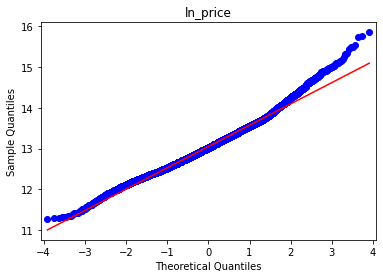

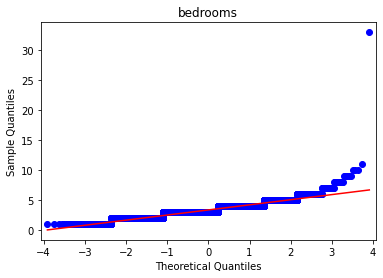

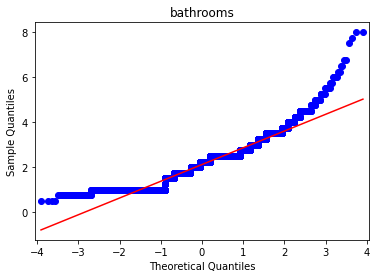

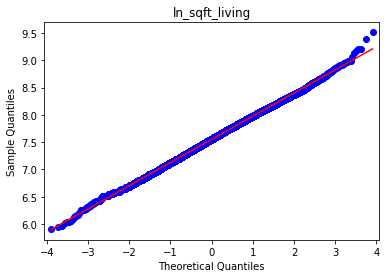

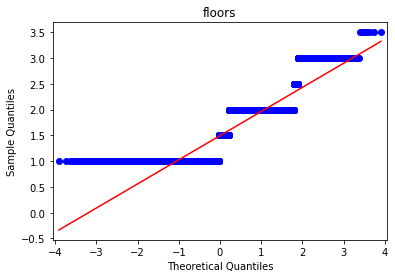

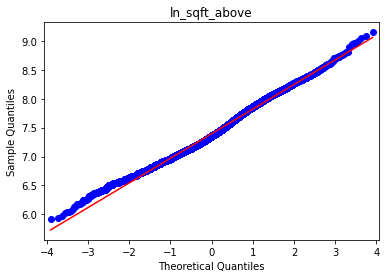

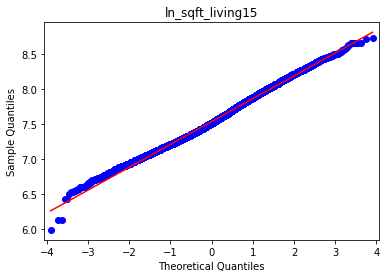

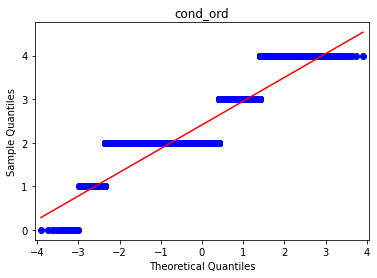

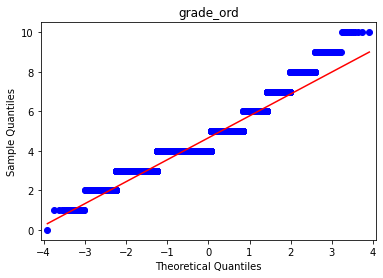

In [98]:
#QQ plot generated for each feature to identify outliers that may need to be dropped before 
#the final model is created
for e, f in enumerate(semi_final_df.columns):
    sm.qqplot(semi_final_df[f], line='r');
    plt.title(f)

QQ plot indicates that bedrooms are significantly affected by outliers, and bathrooms may be significantly skewed/non-normally distributed. Final iteration of our model will experiment with removal of bathrooms as a feature and trimming outliers from the dataset that are affecting bedroom regression modeling. 

## Additional feature cleaning

In [99]:
#identify houses with the most bedrooms (top 10)
bed_10 = semi_final_df.sort_values(by="bedrooms", ascending=False)[0:10]
bed_10

,ln_price,bedrooms,bathrooms,ln_sqft_living,floors,ln_sqft_above,ln_sqft_living15,cond_ord,grade_ord
15856,13.37,33,1.75,7.39,1.00,6.95,7.19,4.00,4.00
8748,13.16,11,3.00,8.01,2.00,7.78,7.26,2.00,4.00
13301,13.96,10,5.25,8.43,1.00,7.82,7.91,2.00,6.00
19239,13.40,10,3.00,7.98,2.00,7.53,7.50,3.00,4.00
15147,13.38,10,2.00,8.19,2.00,8.01,7.62,3.00,4.00
6073,14.06,9,4.50,8.20,2.00,7.84,7.83,2.00,5.00
4231,13.46,9,3.00,8.21,2.00,7.95,7.58,2.00,4.00
16830,14.15,9,4.00,8.44,2.50,8.26,7.90,2.00,8.00
8537,13.02,9,7.50,8.31,2.00,8.31,7.28,2.00,4.00
4092,13.30,9,4.50,8.25,2.50,7.80,7.29,2.00,4.00


In [100]:
#since the house with 33 bedrooms has a smaller number of bathrooms than houses with 1/3 the number of 
#bedrooms, it is likely that this data is actually a typo and is significantly skewing the data.
#Therefore, we will drop this house from the overall dataset before constructing the final model.
#index position is 15856, however, we will reevaluate to ensure we dropped the correct data point

semi_final_df.drop(index=15856, inplace=True)
#reevaluate
bed_10 = semi_final_df.sort_values(by="bedrooms", ascending=False)[0:10]
bed_10

,ln_price,bedrooms,bathrooms,ln_sqft_living,floors,ln_sqft_above,ln_sqft_living15,cond_ord,grade_ord
8748,13.16,11,3.00,8.01,2.00,7.78,7.26,2.00,4.00
19239,13.40,10,3.00,7.98,2.00,7.53,7.50,3.00,4.00
15147,13.38,10,2.00,8.19,2.00,8.01,7.62,3.00,4.00
13301,13.96,10,5.25,8.43,1.00,7.82,7.91,2.00,6.00
4092,13.30,9,4.50,8.25,2.50,7.80,7.29,2.00,4.00
18428,13.75,9,3.00,7.94,2.00,7.54,7.81,2.00,4.00
16830,14.15,9,4.00,8.44,2.50,8.26,7.90,2.00,8.00
8537,13.02,9,7.50,8.31,2.00,8.31,7.28,2.00,4.00
4231,13.46,9,3.00,8.21,2.00,7.95,7.58,2.00,4.00
6073,14.06,9,4.50,8.20,2.00,7.84,7.83,2.00,5.00


## Final Model Development

In [101]:
semi_final_df.head()

,ln_price,bedrooms,bathrooms,ln_sqft_living,floors,ln_sqft_above,ln_sqft_living15,cond_ord,grade_ord
0,12.31,3,1.00,7.07,1.00,7.07,7.20,2.00,4.00
1,13.20,3,2.25,7.85,2.00,7.68,7.43,2.00,4.00
2,12.10,2,1.00,6.65,1.00,6.65,7.91,2.00,3.00
3,13.31,4,3.00,7.58,1.00,6.96,7.22,4.00,4.00
4,13.14,3,2.00,7.43,1.00,7.43,7.50,2.00,5.00


In [102]:
#experimenting with dropping the bathrooms feature due to non-normality and heavy presence of outliers
new_target = semi_final_df["ln_price"]
final_inputs = semi_final_df.drop(columns=["bathrooms","ln_price"])
construct_model(final_inputs, new_target)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     4214.
Date:                Fri, 28 Oct 2022   Prob (F-statistic):               0.00
Time:                        16:44:29   Log-Likelihood:                -7490.0
No. Observations:               21596   AIC:                         1.500e+04
Df Residuals:                   21588   BIC:                         1.506e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               12.8945      0.004   3264.462      0.000      12.887      12.902
bedrooms            -0.0306      0.003     -8.928      0.000      -0.037      -0.024
ln_sqft_living       0.3168      0.008     39.536      0.000       0.301       0.332
floors               0.0642      0.006     11.484      0.000       0.053       0.075
ln_sqft_above       -0.1658      0.008    -20.656      0.000      -0.182      -0.150
ln_sqft_living15     0.1018      0.005     19.244      0.000       0.091       0.112
cond_ord             0.1011      0.004     26.944      0.000       0.094       0.109
grade_ord            0.2019      0.003     60.195      0.000       0.195       0.208
==============================================================================
Omnibus:                       88.513   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.500
Skew:                           0.157   Prob(JB):                     3.68e-20
Kurtosis:                       3.031   Cond. No.                         8.17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [103]:
#final comparison model with bathroom data retained
new_target = semi_final_df["ln_price"]
final_inputs = semi_final_df.drop(columns=["ln_price"])
construct_model(final_inputs, new_target)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     3687.
Date:                Fri, 28 Oct 2022   Prob (F-statistic):               0.00
Time:                        16:44:29   Log-Likelihood:                -7489.8
No. Observations:               21596   AIC:                         1.500e+04
Df Residuals:                   21587   BIC:                         1.507e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               12.8938      0.004   3143.285      0.000      12.886      12.902
bedrooms            -0.0303      0.003     -8.729      0.000      -0.037      -0.023
bathrooms           -0.0024      0.004     -0.610      0.542      -0.010       0.005
ln_sqft_living       0.3188      0.009     36.799      0.000       0.302       0.336
floors               0.0654      0.006     11.055      0.000       0.054       0.077
ln_sqft_above       -0.1664      0.008    -20.587      0.000      -0.182      -0.151
ln_sqft_living15     0.1017      0.005     19.236      0.000       0.091       0.112
cond_ord             0.1010      0.004     26.882      0.000       0.094       0.108
grade_ord            0.2023      0.003     59.377      0.000       0.196       0.209
==============================================================================
Omnibus:                       88.479   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.466
Skew:                           0.157   Prob(JB):                     3.74e-20
Kurtosis:                       3.033   Cond. No.                         9.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Results

In [104]:
# The Final Final Model
final_target_df = semi_final_df["ln_price"]
final_inputs_df = semi_final_df.drop(columns=["bathrooms","ln_price"])

#construct final model and prep data for export
#scale the data
rscale = RobustScaler()
rs = rscale.fit_transform(final_inputs_df)
rs_df = pd.DataFrame(rs, columns=final_inputs_df.columns, index=final_target_df.index)

#final construction    
exog = sm.add_constant(rs_df)
endog = final_target_df
final_model = sm.OLS(endog, exog).fit()

#final dataframe prepping for export (1) rename scaled data (2) join all 3 dataframes
#1
rs_df.rename(columns={name:f'scl_{name}' for name in rs_df.columns}, inplace=True)
#2
final_df = pd.concat([final_target_df, final_inputs_df, rs_df], axis=1)

#generating summary statistics
fmss = final_model.summary()
fmss

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     4214.
Date:                Fri, 28 Oct 2022   Prob (F-statistic):               0.00
Time:                        16:44:29   Log-Likelihood:                -7490.0
No. Observations:               21596   AIC:                         1.500e+04
Df Residuals:                   21588   BIC:                         1.506e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               12.8945      0.004   3264.462      0.000      12.887      12.902
bedrooms            -0.0306      0.003     -8.928      0.000      -0.037      -0.024
ln_sqft_living       0.3168      0.008     39.536      0.000       0.301       0.332
floors               0.0642      0.006     11.484      0.000       0.053       0.075
ln_sqft_above       -0.1658      0.008    -20.656      0.000      -0.182      -0.150
ln_sqft_living15     0.1018      0.005     19.244      0.000       0.091       0.112
cond_ord             0.1011      0.004     26.944      0.000       0.094       0.109
grade_ord            0.2019      0.003     60.195      0.000       0.195       0.208
==============================================================================
Omnibus:                       88.513   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.500
Skew:                           0.157   Prob(JB):                     3.68e-20
Kurtosis:                       3.031   Cond. No.                         8.17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
prediction = final_model.predict(exog)
prediction # scatter endog and pred 
#polyfit to draw line (predicted, actual)

0       12.60
1       12.98
2       12.47
3       13.09
4       12.97
         ... 
21592   13.04
21593   13.10
21594   12.60
21595   12.97
21596   12.60
Length: 21596, dtype: float64

In [106]:
# extract coefficients table
accursed_table = pd.DataFrame(fmss.tables[1].data[0:])
accursed_table

,0,1,2,3,4,5,6
0,,coef,std err,t,P>|t|,[0.025,0.975]
1,const,12.8945,0.004,3264.462,0.000,12.887,12.902
2,bedrooms,-0.0306,0.003,-8.928,0.000,-0.037,-0.024
3,ln_sqft_living,0.3168,0.008,39.536,0.000,0.301,0.332
4,floors,0.0642,0.006,11.484,0.000,0.053,0.075
5,ln_sqft_above,-0.1658,0.008,-20.656,0.000,-0.182,-0.150
6,ln_sqft_living15,0.1018,0.005,19.244,0.000,0.091,0.112
7,cond_ord,0.1011,0.004,26.944,0.000,0.094,0.109
8,grade_ord,0.2019,0.003,60.195,0.000,0.195,0.208


In [107]:
#replace columns with the appropriate headers
new_header = accursed_table.iloc[0]
accursed_table = accursed_table[1:]
accursed_table.columns = new_header
accursed_table

,,coef,std err,t,P>|t|,[0.025,0.975]
1,const,12.8945,0.004,3264.462,0.000,12.887,12.902
2,bedrooms,-0.0306,0.003,-8.928,0.000,-0.037,-0.024
3,ln_sqft_living,0.3168,0.008,39.536,0.000,0.301,0.332
4,floors,0.0642,0.006,11.484,0.000,0.053,0.075
5,ln_sqft_above,-0.1658,0.008,-20.656,0.000,-0.182,-0.150
6,ln_sqft_living15,0.1018,0.005,19.244,0.000,0.091,0.112
7,cond_ord,0.1011,0.004,26.944,0.000,0.094,0.109
8,grade_ord,0.2019,0.003,60.195,0.000,0.195,0.208


In [108]:
#sort table by coefficients
blursed_table = accursed_table.sort_values(by="coef", ascending=False)
blursed_table

,,coef,std err,t,P>|t|,[0.025,0.975]
1,const,12.8945,0.004,3264.462,0.000,12.887,12.902
5,ln_sqft_above,-0.1658,0.008,-20.656,0.000,-0.182,-0.150
2,bedrooms,-0.0306,0.003,-8.928,0.000,-0.037,-0.024
3,ln_sqft_living,0.3168,0.008,39.536,0.000,0.301,0.332
8,grade_ord,0.2019,0.003,60.195,0.000,0.195,0.208
6,ln_sqft_living15,0.1018,0.005,19.244,0.000,0.091,0.112
7,cond_ord,0.1011,0.004,26.944,0.000,0.094,0.109
4,floors,0.0642,0.006,11.484,0.000,0.053,0.075


In [109]:
#Top two features increasing home sale price in 2014-2015 were ln_sqft_living, and grade_ord 
#from the assessors office for King County, Washington

In [110]:
#homoskedasticity test
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

#Goldfeldt-Quandt
test_result = sms.het_goldfeldquandt(final_model.resid, final_model.model.exog)
name = ['F statistic', 'p-value']
unladen_swallow = lzip(name, test_result)
unladen_swallow

[('F statistic', 0.9412810474055471), ('p-value', 0.9991627443216671)]

## Visualizations and Exports

In [111]:
final_df.columns

Index(['ln_price', 'bedrooms', 'ln_sqft_living', 'floors', 'ln_sqft_above',
       'ln_sqft_living15', 'cond_ord', 'grade_ord', 'scl_bedrooms',
       'scl_ln_sqft_living', 'scl_floors', 'scl_ln_sqft_above',
       'scl_ln_sqft_living15', 'scl_cond_ord', 'scl_grade_ord'],
      dtype='object')

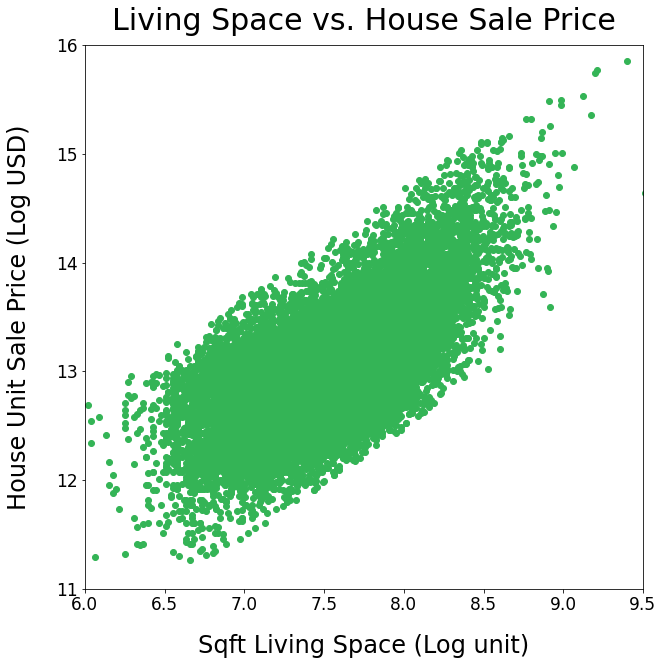

In [112]:
#visualize model for living space correlation

#variable declaration: see model summary for coefficient and intercept values
x = final_df["ln_sqft_living"]
y = final_df["ln_price"]
m = 0.3188
b0 = 12.8938
y_ticks_liv = [11, 12, 13, 14, 15, 16]
x_ticks_liv = [6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5]

fig, ax = plt.subplots(figsize=(10,10))
fig = plt.scatter(x=x,y=y, color="#34b456")

ax.set_xlabel('Sqft Living Space (Log unit)', fontsize=24, labelpad=20) 
ax.set_ylabel('House Unit Sale Price (Log USD)', fontsize=24, labelpad=25) 
ax.set_title('Living Space vs. House Sale Price', fontsize=30, pad=15); 

ax.set_ylim(11, 16, 1)
ax.set_yticks(y_ticks_liv)
ax.set_yticklabels(y_ticks_liv, fontsize=17)
ax.set_xlim(6, 9.5, 1)
ax.set_xticks(x_ticks_liv)
ax.set_xticklabels(x_ticks_liv, fontsize=17)

plt.savefig('./Results/Sqft_Living_v_Sale_Price.jpg', bbox_inches='tight')

<ipython-input-113-80ea020c8252>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_val, fontsize=17)
<ipython-input-113-80ea020c8252>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_val, fontsize=17)


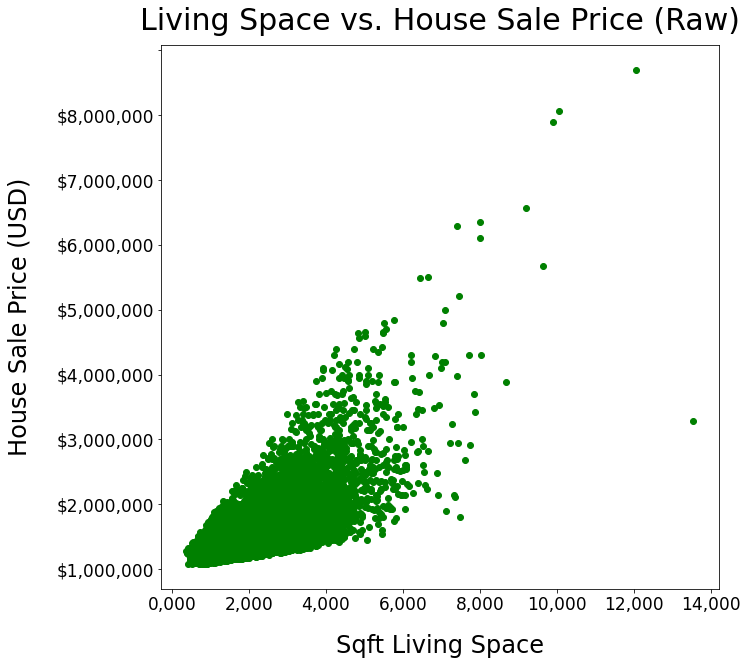

In [113]:
#visualize the raw correlation of living space v house sales (non-transformed)
#variable declaration: see model summary for coefficient and intercept values
x = np.exp(final_df["ln_sqft_living"])
y = np.exp(final_df["ln_price"])
m = 0.3188
b0 = 12.8938

fig, ax = plt.subplots(figsize=(10,10))
fig = plt.scatter(x=x,y=y, color="green")

ax.set_xlabel('Sqft Living Space', fontsize=24, labelpad=20) 
ax.set_ylabel('House Sale Price (USD)', fontsize=24, labelpad=25) 
ax.set_title('Living Space vs. House Sale Price (Raw)', fontsize=30, pad=15); 

x_val=[f"{x*2},000" for x in range(-1,8)]
y_val=[f"${y},000,000" for y in range(0,9)]
ax.set_xticks=[x*2000 for x in range(-1,8)]
ax.set_yticks=[y*1000000 for y in range(0,9)]
ax.set_xticklabels(x_val, fontsize=17)
ax.set_yticklabels(y_val, fontsize=17)

plt.savefig('./Results/Raw_Sqft_Living_v_Sale_Price.jpg', bbox_inches='tight')

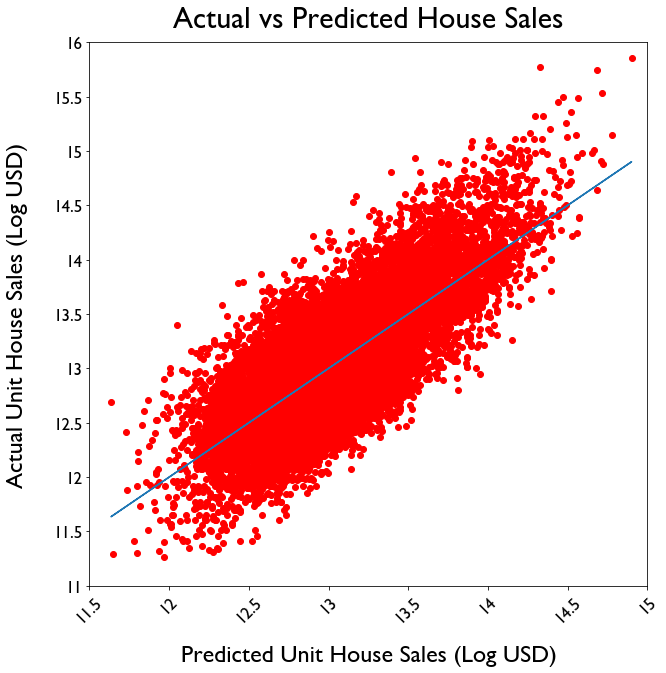

In [114]:
#visualize model overall performance

# Change font family
plt.rcParams.update({'font.family':'Gill Sans'})

fig, ax = plt.subplots(figsize=(10,10))
fig = plt.scatter(x=prediction,y=endog, color="red")
y_ticks = [11, 11.5, 12, 12.5, 13, 13.5, 14, 14.5, 15, 15.5, 16]
x_ticks = [11.5, 12, 12.5, 13, 13.5, 14, 14.5, 15]

ax.set_xlabel('Predicted Unit House Sales (Log USD)', fontsize=24, labelpad=20) #color='white
ax.set_ylabel('Actual Unit House Sales (Log USD)', fontsize=24, labelpad=25) #color='white'
ax.set_title('Actual vs Predicted House Sales', fontsize=30, pad=15) #color='white'

ax.set_ylim(11, 16, .5)
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticks, fontsize=17)
ax.set_xlim(11.5, 15, .5)
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticks, fontsize=17, rotation=45)

#ax.set_xticklabels(prediction, fontsize=15, rotation=45); #color='white'

m, b0 = np.polyfit(prediction, endog, deg=1)
plt.plot(prediction, m*prediction+b0);
plt.savefig('./Results/Actual_v_Predicted.jpg', bbox_inches='tight')

<ipython-input-115-5c5e9ff016c3>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_val, fontsize=17, rotation=45)
<ipython-input-115-5c5e9ff016c3>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_val, fontsize=17)


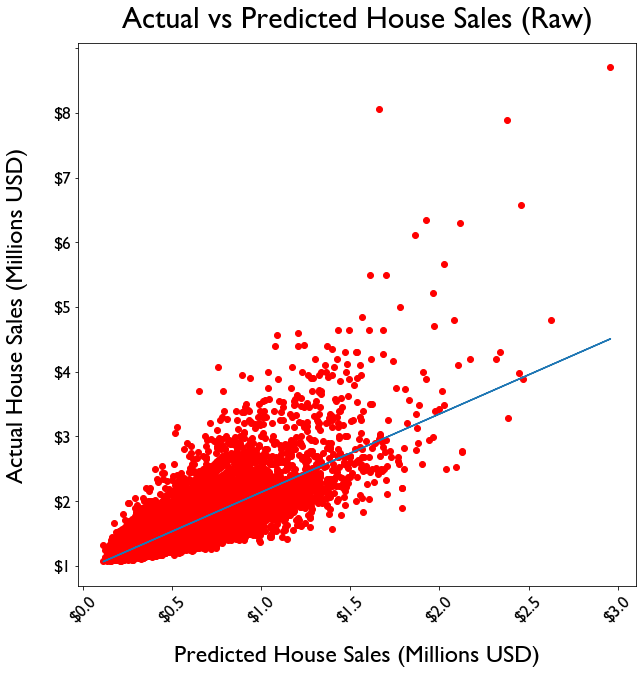

In [115]:
#visualize model for living space correlation

fig, ax = plt.subplots(figsize=(10,10))
fig = plt.scatter(x=np.exp(prediction),y=np.exp(endog), color="red")

ax.set_xlabel('Predicted House Sales (Millions USD)', fontsize=24, labelpad=20) #color='white
ax.set_ylabel('Actual House Sales (Millions USD)', fontsize=24, labelpad=25) #color='white'
ax.set_title('Actual vs Predicted House Sales (Raw)', fontsize=30, pad=15) #color='white'

x_val=[f"${x/2}" for x in range(-1,7)]
y_val=[f"${y}" for y in range(0,9)]
ax.set_xticks=[(x/2)*1000000 for x in range(-1,7)]
ax.set_yticks=[y*1000000 for y in range(0,9)]
ax.set_xticklabels(x_val, fontsize=17, rotation=45)
ax.set_yticklabels(y_val, fontsize=17)

m, b0 = np.polyfit(np.exp(prediction), np.exp(endog), deg=1)
plt.plot(np.exp(prediction), m*(np.exp(prediction))+b0);
plt.savefig("./Results/Raw_Actual_v_Predicted.jpg", bbox_inches='tight')

In [116]:
coef_df = pd.DataFrame({'coef': {'Sqft Above': -0.1164, 'Bedrooms': -0.0303, 
                        'Sqft Living': 0.3188, 'Grade': 0.2023, 'Sqft Living 15': 0.1017, 
                        'Condition': 0.1010, 'Floors': 0.0654}})
coef_sorted_df = coef_df.sort_values(by='coef', ascending=False).reset_index()
coef_sorted_df

,index,coef
0,Sqft Living,0.32
1,Grade,0.20
2,Sqft Living 15,0.10
3,Condition,0.10
4,Floors,0.07
5,Bedrooms,-0.03
6,Sqft Above,-0.12


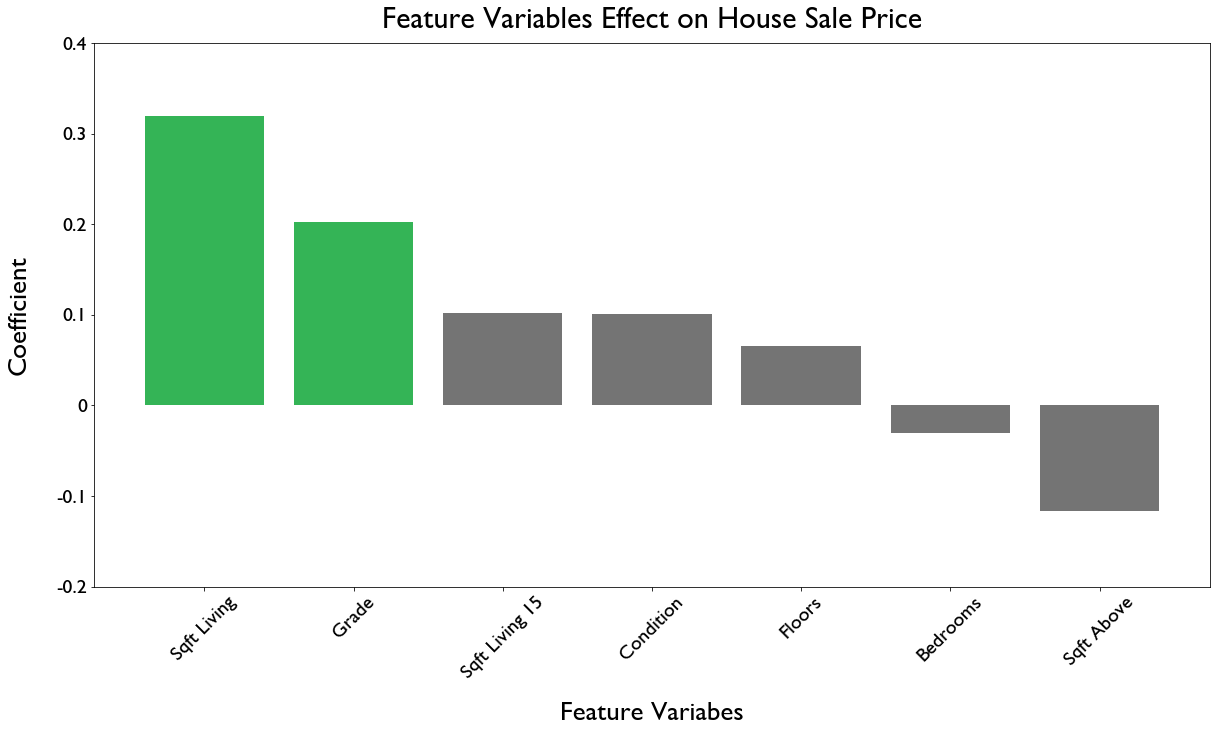

In [117]:
#vizualize model for coefficients

# Create variables for chart
coef_x = coef_sorted_df['index']
coef_y = coef_sorted_df['coef']
y_ticks = [-.2, -.1, 0, .1, .2, .3, .4]
c = ['#34b456', '#34b456', '#747474', '#747474', '#747474', '#747474', '#747474']
# Change font family
plt.rcParams.update({'font.family':'Gill Sans'})

# Create bar chart
fig, ax = plt.subplots(figsize = (20,10))

bars = ax.bar(coef_x, coef_y, color=c)
ax.set_xlabel('Feature Variabes', fontsize=27, labelpad=20) #color='white'
ax.set_ylabel('Coefficient', fontsize=27, labelpad=25) #color='white'
ax.set_title('Feature Variables Effect on House Sale Price', fontsize=30, pad=15) #color='white'
ax.set_ylim(-.2, .4, 1)
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticks, fontsize=20) #color='white'
ax.set_xticks(coef_x)
ax.set_xticklabels(coef_x, fontsize=20, rotation=45); #color='white'
plt.savefig("./Results/Coeff_Bar_Chart.jpg", bbox_inches='tight')

In [118]:
pd.DataFrame(final_df.groupby(by='grade_ord', axis=0).mean()['ln_price'])

,ln_price
grade_ord,
0.00,12.48
1.00,12.16
2.00,12.32
3.00,12.54
4.00,12.84
5.00,13.14
6.00,13.49
7.00,13.80
8.00,14.13


In [119]:
grade_ord_viz_df = pd.DataFrame({'Grade': {'Poor': 12.1112, 'Low': 12.1602, 
                        'Fair': 12.3233, 'Low Average': 12.5438, 'Average': 12.8365, 
                        'Good': 13.1362, 'Better': 13.4874, 'Very Good': 13.8030, 'Excellent': 14.1319, 'Luxury': 14.5147,
                        'Mansion': 15.0282}}).reset_index()
grade_ord_sort_viz_df = grade_ord_viz_df.sort_values(by='Grade', ascending=True)

In [120]:
grade_ord_sort_viz_df

,index,Grade
9,Poor,12.11
5,Low,12.16
3,Fair,12.32
6,Low Average,12.54
0,Average,12.84
4,Good,13.14
1,Better,13.49
10,Very Good,13.80
2,Excellent,14.13
7,Luxury,14.51


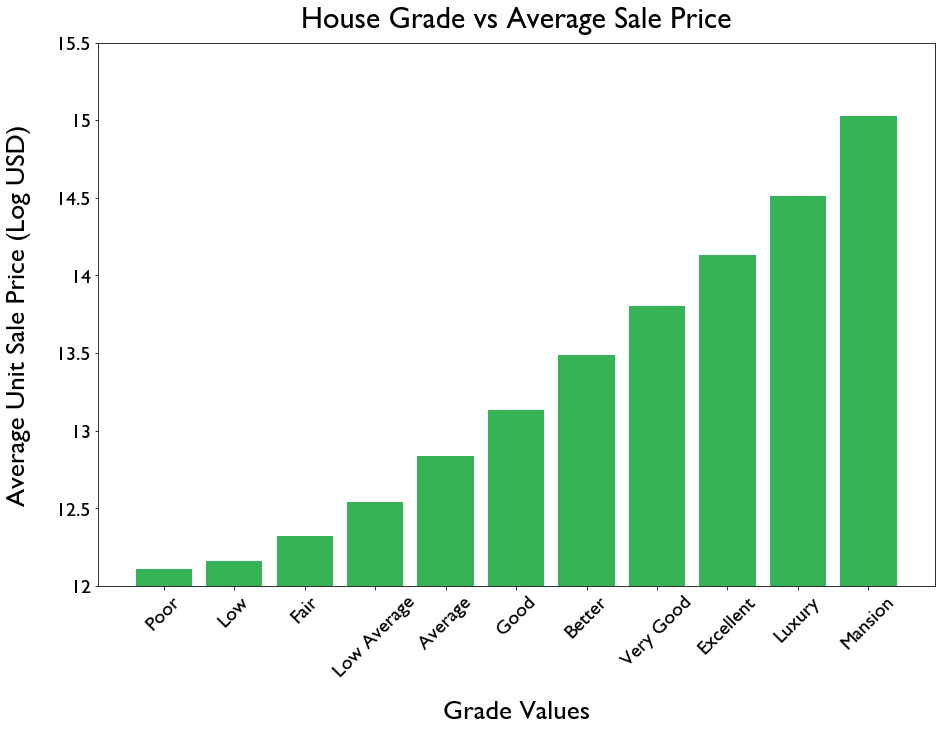

In [121]:
#visualize model for assessor grade correlation
#vizualize model for coefficients

# Create variables for chart
grade_ord_x = grade_ord_sort_viz_df['index']
ln_price_y = grade_ord_sort_viz_df['Grade']
y_ticks = [12, 12.5, 13, 13.5, 14, 14.5, 15, 15.5]
c = ['#34b456', '#34b456', '#34b456', '#34b456', '#34b456', '#34b456', '#34b456', '#34b456', '#34b456', '#34b456', '#34b456']
# Change font family
plt.rcParams.update({'font.family':'Gill Sans'})

# Create bar chart
fig, ax = plt.subplots(figsize = (15,10))

bars = ax.bar(grade_ord_x, ln_price_y, color=c)
ax.set_xlabel('Grade Values', fontsize=27, labelpad=20) #color='white'
ax.set_ylabel('Average Unit Sale Price (Log USD)', fontsize=27, labelpad=25) #color='white'
ax.set_title('House Grade vs Average Sale Price', fontsize=30, pad=15) #color='white'
ax.set_ylim(12, 13, .5)
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticks, fontsize=20) #color='white'
ax.set_xticks(grade_ord_x)
ax.set_xticklabels(grade_ord_x, fontsize=20, rotation=45); #color='white'

plt.savefig('./Results/Grade_vs_Price.jpg', bbox_inches='tight')

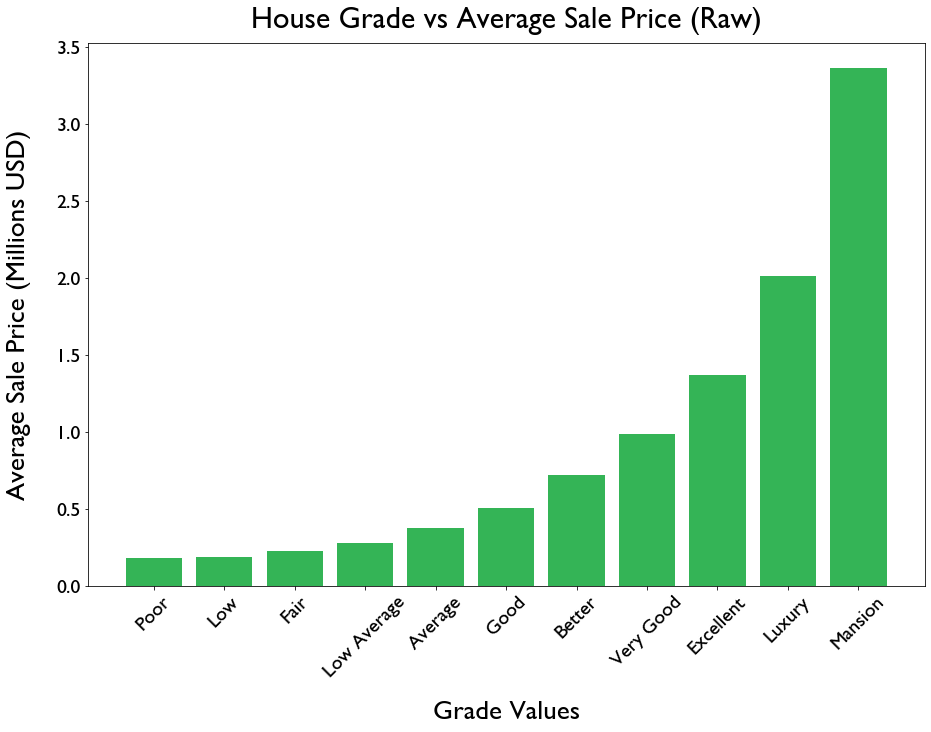

In [122]:
#visualize model for assessor grade correlation (raw price)
#vizualize model for coefficients

# Create variables for chart
grade_ord_x = grade_ord_sort_viz_df['index']
ln_price_y = np.exp(grade_ord_sort_viz_df['Grade'])
y_ticks = [y/2 for y in range(0,8)]
c = ['#34b456', '#34b456', '#34b456', '#34b456', '#34b456', '#34b456', '#34b456', '#34b456', '#34b456', '#34b456', '#34b456']

# Create bar chart
fig, ax = plt.subplots(figsize = (15,10))

bars = ax.bar(grade_ord_x, ln_price_y, color=c)
ax.set_xlabel('Grade Values', fontsize=27, labelpad=20) #color='white'
ax.set_ylabel('Average Sale Price (Millions USD)', fontsize=27, labelpad=25) #color='white'
ax.set_title('House Grade vs Average Sale Price (Raw)', fontsize=30, pad=15) #color='white'

ax.set_yticks([y*1000000 for y in y_ticks])
ax.set_yticklabels(y_ticks, fontsize=20) #color='white'
ax.set_xticks(grade_ord_x)
ax.set_xticklabels(grade_ord_x, fontsize=20, rotation=45); #color='white'

plt.savefig('./Results/Raw_Grade_vs_Price.jpg', bbox_inches='tight')

# Discussion

***
Our final model was a multiple linear regression model using ordinary least squares, which, included seven features that had a significant p-value and did not cause our model to violate assumptions of linear regression. Each of these features was included for consideration based on the strength of its correlation with home sale price, and then was retained or dropped from the final model based on its effects on the model's performance. 

The results we obtained for our model generally indicate that it will be an effective tool for our client, and the transformations we performed ensure that the model retains accuracy for homes in all value ranges. In turn, this means that the features we have indicated to our client as being the best ones to model on will perform equally well for the wide variety of homes they insure. 

Linear regression models rely on 4 key assumptions: Linearity, Independence, Normality of Errors, and Homoskedasticity. 

Early on, several of our underlying features displayed a non-linear relationship to our target due to skew in their distributions. We addressed this issue via log transformation of our target, home sale price, as well as some of our features. 

Independence was assessed via the Condition Number, which, for our final model, was 8.17. While this does indicate a small degree of multicollinearity, this is within the expected limits for this metric and a model of this type. Independence is also assessed via the Durbin-Watson score, which, is ideally a value of 2 on a scale from 0 to 4. Our Durbin-Watson score is 1.97, thus confirming that our features are independent.

Normality of Errors was assessed via two different metrics: Jarque-Bera probability, and Quantile-Quantile plotting. Due to the non-continuous nature of some features, as well as the degree of skew in the features available to us, we were unable to satisfy the Jarque-Bera probability test, however, this test is known to be extremely sensitive. Quantile-Quantile plotting showed our features to be relatively normal, and our scaler was chosen specifically due to its use of the median for its center to increase the normality of the features in our final model. Although we did not successfully pass the Jarque-Bera test, significant improvement was made over the course of our model development, and features that violated both tests were removed before constructing the final model. 

Homoskedasticity was measured using the Goldfeldt-Quandt test. This test measures heteroskedasticity against a null hypothesis of homoskedasticity. Our p-value was ~0.99, so we fail to reject the null and find our model is homoskedastic. 

Our R^2 value is 0.577, indicating that our model explains approximately 57.7% of the variance in house sale price. This is a significant model with an overall p-value less than 0.001, and an effective method for identifying key features for predicting home sale price. 

One feature we suspect would improve the accuracy of our model was home location, however, based on domain knowledge about the relationship between location and several other features in our model, we also suspected that this feature would share a high degree of multicollinearity with the rest of our model. Obtaining additional data to explore interactions between location and other features is potentially an area for further research that could yield further improvements to the model we have developed here, while simultaneously addressing the problem of multicollinearity.
***
# Impact for Flatiron Insurance
***
We have developed a robust multiple linear regression model that provides our client with several powerful predictors of home value in a potential new market that they are looking to enter. Using this information, we believe that Flatiron Insurance will have gained key insights that will improve their ability to provide insurance to homeowners in King County, thus giving them a competitive edge. With further development to our model, we believe it has the potential to provide our client with powerful predictive estimates of their customer's property values that will have a significant impact on the prices Flatiron Insurance can offer and the coverage they can provide.